In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import string
import os
import glob
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib
import matplotlib.pyplot as plt


In [2]:
fto = '/storage/stations/LS/vezicka/'


/storage/stations/LS/vezicka/efm_down/efm_down.csv.2024-05-24_21
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2024-05-24_13
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2024-05-24_19
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2024-05-24_00
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2024-05-24_07
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2024-05-24_14
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2024-05-24_22
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2024-05-24_10
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2024-05-24_03
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2024-05-24_09
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2024-05-24_04
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2024-05-24_17
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2024-05-24_15
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2024-05-24_06
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2024-05-24_01
/storage/stations/LS/vezi

Text(0.5, 0, 'Time')

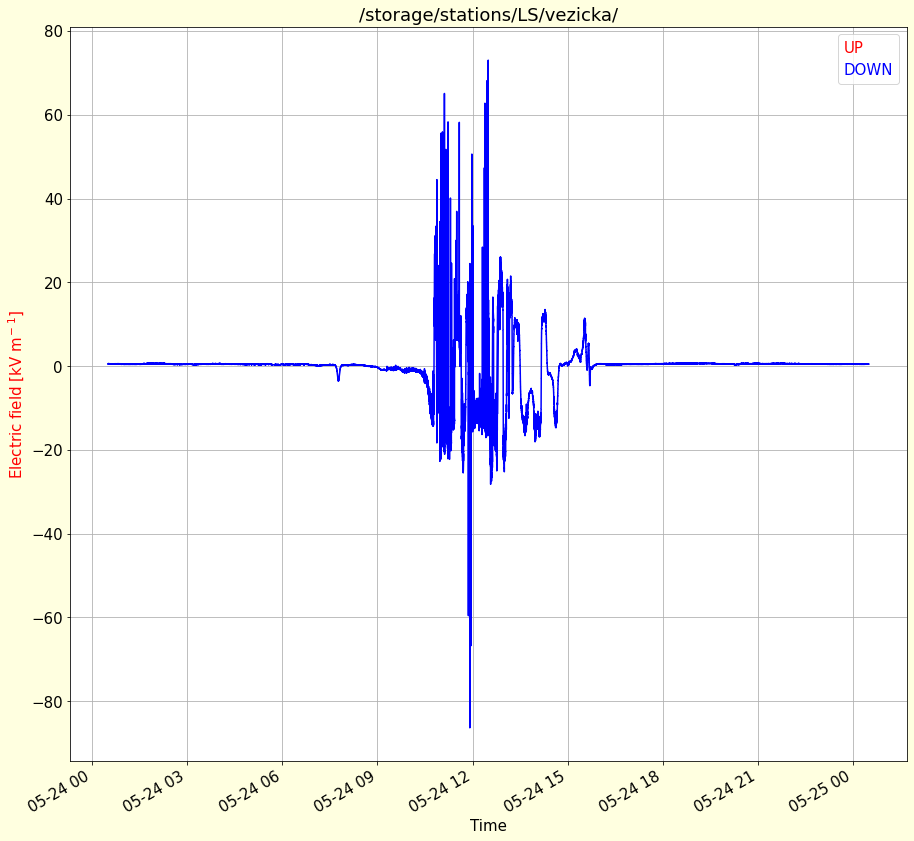

In [20]:
ftt = glob.iglob(fto+"/**/efm*.csv.2023-08-30*") # generator, search immediate subdirectories 
ftt = glob.iglob(fto+"/**/efm*.csv.2023-07-25*") # generator, search immediate subdirectories 
ftt = glob.iglob(fto+"/**/efm*.csv.2024-05-24*") # generator, search immediate subdirectories 

plt.figure(figsize=(15,15), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})

for f in ftt:
    print(f)
    l=[]
    l.extend(range(0,4))
    
    df = pd.read_csv(f, sep=',', header=None, names=l, comment='*', low_memory=False, on_bad_lines='skip')

    if 'up' in f:
        label = 'UP'
        color = 'red'
        factor = 5
    else:
        label = 'DOWN'
        color = 'blue'
        factor = 5.3
   
    
    df['field'] = df[1].str.replace('$', '', regex=False)
    df['time'] = pd.to_datetime(df[0],unit='s')
    df.set_index('time', inplace=True, drop=False)
    df['field'] = pd.to_numeric(df['field'], errors='coerce')
    
    (df['field']*factor).plot(label=label, color=color)

plt.ylabel('Electric field [kV m$^-$$^1$]', color='red')
plt.title(fto)
#plt.legend()
plt.legend(['UP','DOWN'], labelcolor=['red','blue'], handlelength=0, handletextpad=0, fancybox=True) 
plt.grid(which='both')
plt.xlabel('Time')
#plt.yscale('symlog')

#plt.ylim(-50,50)
#plt.ylim(-2,2)
#plt.xlim('2023-05-29 21:00','2023-05-29 23:59')
#plt.xlim('2023-08-30 15:00','2023-08-30 21:30')
#plt.xlim('2023-07-25 10:00','2023-07-25 13:00')


/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-06-14_01
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-06-14_12
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-06-14_18
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-06-14_20
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-06-14_15
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-06-14_06
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-06-14_02
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-06-14_11
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-06-14_23
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-06-14_16
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-06-14_05
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-06-14_07
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-06-14_14
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-06-14_19
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-06-14_13
/storage/stations/LS/vezi

(19522.375, 19522.416666666668)

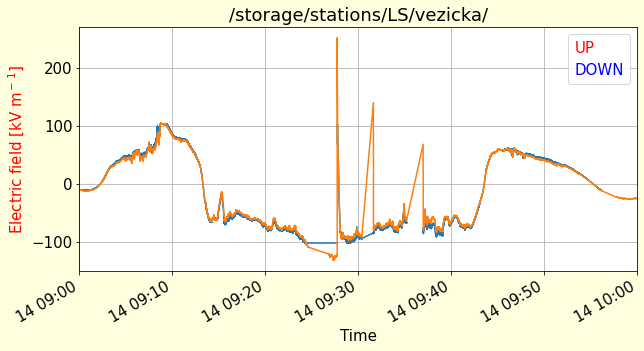

In [67]:
ftt = glob.iglob(fto+"/**/efm*.csv.2023-08-30*") # event do prezentace TEPA
ftt = glob.iglob(fto+"/**/efm*.csv.2023-06-14*") # mega event
#ftt = glob.iglob(fto+"/**/efm*.csv.2024-06-10*") # polarni zare
#ftt = glob.iglob(fto+"/**/efm*.csv.2024-05-24*") # megaevent

plt.figure(figsize=(10,5), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})

up = pd.DataFrame()
down = pd.DataFrame()

for f in ftt:
    print(f)
    l=[]
    l.extend(range(0,4))
    
    df = pd.read_csv(f, sep=',', header=None, names=l, comment='*', low_memory=False, on_bad_lines='skip')

    if 'up' in f:
        label = 'UP'
        color = 'red'
        factor = 5
    else:
        label = 'DOWN'
        color = 'blue'
        factor = 20 #5
   
    
    df['field'] = df[1].str.replace('$', '', regex=False)
    df['time'] = pd.to_datetime(df[0],unit='s')
    df.set_index('time', inplace=True, drop=False)
    df['field'] = pd.to_numeric(df['field'], errors='coerce') * factor
    
    if 'up' in f:
        up = pd.concat([up,df])
    else:
        down = pd.concat([down,df])

(up['field']).plot(label='UP')
(down['field']).plot(label='down')
plt.ylabel('Electric field [kV m$^-$$^1$]', color='red')
plt.title(fto)
#plt.legend()
plt.legend(['UP','DOWN'], labelcolor=['red','blue'], handlelength=0, handletextpad=0, fancybox=True) 
plt.grid(which='both')
plt.xlabel('Time')
#plt.yscale('symlog')

#plt.ylim(-50,50)
#plt.ylim(-2,2)
#plt.xlim('2023-05-29 21:00','2023-05-29 23:59')
#plt.xlim('2023-08-30 15:00','2023-08-30 21:30') # event do prezentace TEPA
plt.xlim('2023-06-14 09:00','2023-06-14 10:00') # mega event


In [15]:
down

,0,1,2,3,field,time
time,,,,,,
2024-05-11 15:30:02.020000000,1.715441e+09,$+05.54,0,NaN,110.8,2024-05-11 15:30:02.020000000
2024-05-11 15:30:02.069999872,1.715441e+09,$+05.56,0,NaN,111.2,2024-05-11 15:30:02.069999872
2024-05-11 15:30:02.109999872,1.715441e+09,$+05.58,0,NaN,111.6,2024-05-11 15:30:02.109999872
2024-05-11 15:30:02.160000000,1.715441e+09,$+05.59,0,NaN,111.8,2024-05-11 15:30:02.160000000
2024-05-11 15:30:02.220000000,1.715441e+09,$+05.59,0,NaN,111.8,2024-05-11 15:30:02.220000000
...,...,...,...,...,...,...
2024-05-11 18:30:01.809999872,1.715452e+09,$-00.25,0,NaN,-5.0,2024-05-11 18:30:01.809999872
2024-05-11 18:30:01.849999872,1.715452e+09,$-00.24,0,NaN,-4.8,2024-05-11 18:30:01.849999872
2024-05-11 18:30:01.900000000,1.715452e+09,$-00.25,0,NaN,-5.0,2024-05-11 18:30:01.900000000


In [98]:
up = up.sort_index()
up = up.resample('1s').mean()
down = down.sort_index()
down = down.resample('1s').mean()


KeyError: 'field'

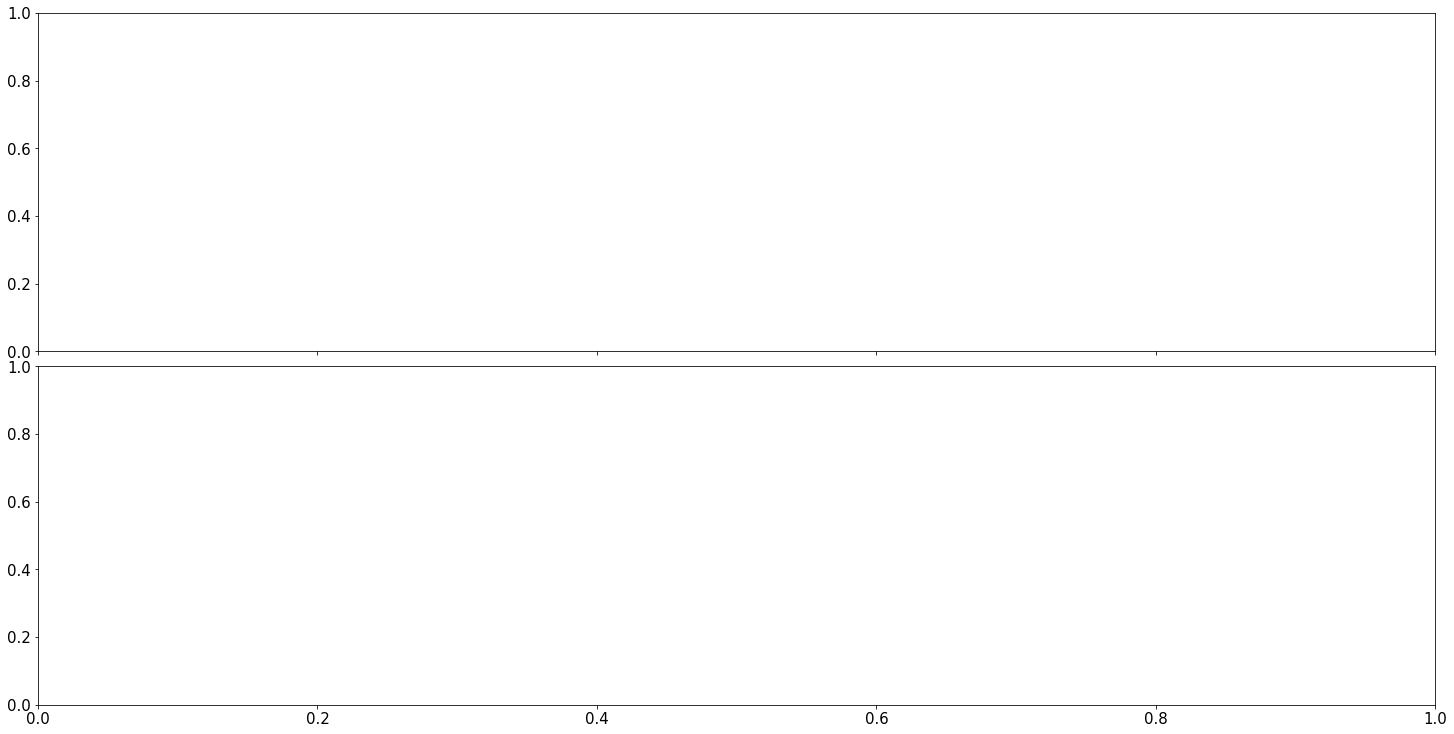

In [16]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(20,10))
matplotlib.rcParams.update({'font.size': 15})
fig.tight_layout(pad=0.0)

ax1.plot((up['field']), marker='.', ls='', label='UP', color='red', alpha=0.5)
ax1.plot((down['field']), marker='.', ls='', label='down', color='blue', alpha=0.5)
ax1.set_ylabel('Electric field [kV m$^-$$^1$]')
ax1.set_title(f)
ax1.legend(fancybox=True) 
ax1.grid(which='both')
#ax1.set_yscale('symlog')

#plt.ylim(-50,50)
#ax1.set_xlim(pd.to_datetime('2023-08-30 15:00'),pd.to_datetime('2023-08-30 22:00'))
ax1.set_xlim(pd.to_datetime('2023-06-14 09:00'),pd.to_datetime('2023-06-14 10:00'))

up['diff'] = (up['field'])-(down['field'])

ax2.plot(up['diff'].loc[abs(up['diff'])>0.06], '.',ms=1, label='DIFF', color='black')
ax2.set_ylabel('Electric field [kV m$^-$$^1$]')
ax2.legend(fancybox=True) 
ax2.grid(which='both')
ax2.set_xlabel('Time')
#ax2.set_yscale('symlog')

#plt.ylim(-50,50)
#ax2.set_xlim(pd.to_datetime('2023-08-30 15:00'),pd.to_datetime('2023-08-30 22:00'))
ax2.set_xlim(pd.to_datetime('2023-06-14 09:00'),pd.to_datetime('2023-06-14 10:00'))


In [67]:
down

In [3]:
fto = '/storage/stations/LS/vezicka/'


/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-17_07
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-16_19
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-16_21
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-17_00
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-17_04
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-17_09
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-16_22
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-16_20
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-17_01
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-17_06
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-17_02
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-17_08
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-16_23
/storage/stations/LS/vezicka/thundermill1/thundermi

(-5.0, 5.0)

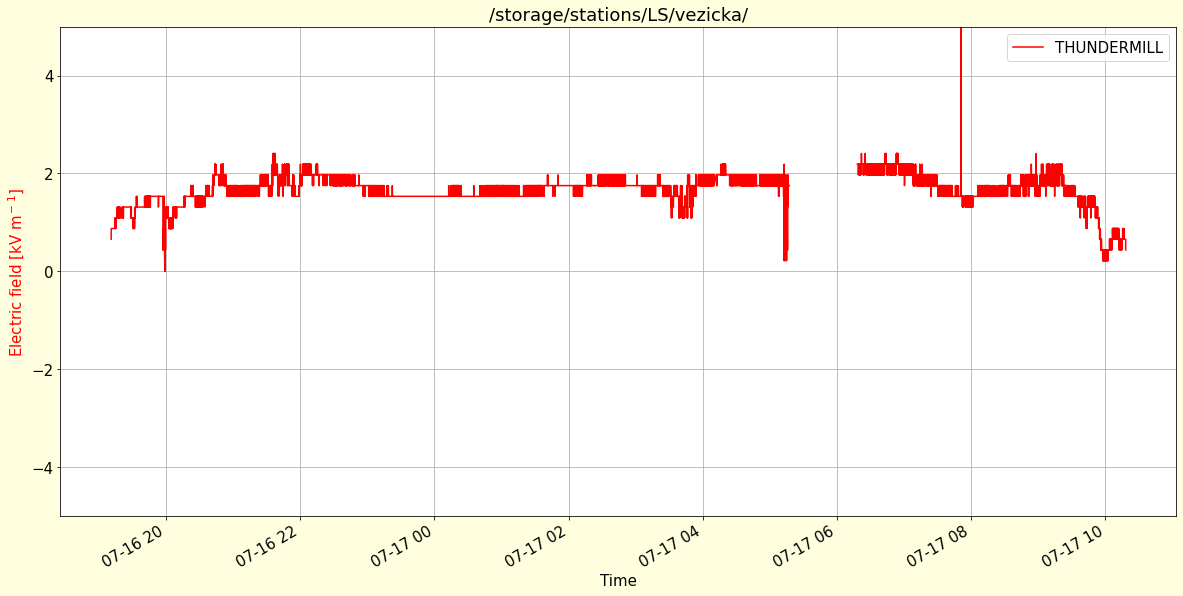

In [11]:
ftt = glob.iglob(fto+"/**/thundermill1.csv.2023-07-*") # generator, search immediate subdirectories 

plt.figure(figsize=(20,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})

for f in ftt:
    print(f)
    l=[]
    l.extend(range(0,200))
    
    df = pd.read_csv(f, sep=',', header=None, names=l, comment='*', low_memory=False, on_bad_lines='skip')

    label = 'THUNDERMILL'
    color = 'red'
    factor = 0.219 # kV/m 
    
    df['field'] = df.iloc[:,1:].max(axis=1)
    df['field1'] = df.iloc[:,1:].min(axis=1)
    df['time'] = pd.to_datetime(df[0],unit='s')
    df.set_index('time', inplace=True, drop=False)
    df['field'] = pd.to_numeric(df['field'])
    
    ((df['field']-128)*factor).plot(label=label, color=color)
    #(df['field1']*factor).plot(label=label, color=color)

plt.ylabel('Electric field [kV m$^-$$^1$]', color='red')
plt.title(fto)
plt.legend(['THUNDERMILL'])
#plt.legend(['UP','DOWN'], labelcolor=['red','blue'], handlelength=0, handletextpad=0, fancybox=True) 
plt.grid()
plt.xlabel('Time')
#plt.ylim(-50,50)
plt.ylim(-5,5)
#plt.xlim('2023-05-29 21:00','2023-05-29 23:59')

In [ ]:
fto = '/storage/stations/LS/vezicka/'
datum = '2023-08-29*'
datum = '2023-09-26*'
#datum = '2023-07-19*'

ftt = glob.iglob(fto+"/**/efm*.csv."+datum) # generator, search immediate subdirectories 

plt.figure(figsize=(20,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})

for f in ftt:
    print(f)
    l=[]
    l.extend(range(0,4))
    
    df = pd.read_csv(f, sep=',', header=None, names=l, comment='*', low_memory=False, on_bad_lines='skip')

    if 'up' in f:
        label = 'UP'
        color = 'red'
        factor = 10
    else:
        label = 'DOWN'
        color = 'blue'
        factor = 10
   
    
    df['field'] = df[1].str.replace('$', '', regex=False)
    df['time'] = pd.to_datetime(df[0],unit='s')
    df.set_index('time', inplace=True, drop=False)
    df['field'] = pd.to_numeric(df['field'], errors='coerce')
    
    (df['field']*factor).plot(label=label, color=color)

plt.ylabel('Electric field [kV m$^-$$^1$]', color='red')
plt.title(fto)
#plt.legend()
#plt.legend(['UP','DOWN'], labelcolor=['red','blue'], handlelength=0, handletextpad=0, fancybox=True) 
plt.grid()
plt.xlabel('Time')
#plt.ylim(-50,50)
#plt.ylim(-2,2)

ftt = glob.iglob(fto+"/**/thundermill1.csv."+datum) # generator, search immediate subdirectories 

for f in ftt:
    print(f)
    l=[]
    l.extend(range(0,200))
    
    df = pd.read_csv(f, sep=',', header=None, names=l, comment='*', low_memory=False, on_bad_lines='skip')

    label = 'THUNDERMILL'
    color = 'green'
    factor = 0.2 # kV/m 
    
    df['field'] = df.iloc[:,1:].max(axis=1)
    df['field1'] = df.iloc[:,1:].min(axis=1)
    df['time'] = pd.to_datetime(df[0],unit='s')
    df.set_index('time', inplace=True, drop=False)
    df['field'] = pd.to_numeric(df['field'])
    
    #((df[125]-256)*factor).plot(label=label, color=color)
    ((df[90]-256)*factor).plot(label=label, color=color)
    #((df['field']-256)*factor).plot(label=label, color='darkgreen')
    #((df['field1']-256)*factor).plot(label=label, color='lightgreen')

plt.ylabel('Electric field [kV m$^-$$^1$]', color='red')
plt.title(fto)
#plt.legend(['THUNDERMILL'])
#plt.legend(['UP','DOWN'], labelcolor=['red','blue'], handlelength=0, handletextpad=0, fancybox=True) 
plt.grid()
plt.xlabel('Time')
#plt.ylim(-100,60)
#plt.ylim(-5,5)
#plt.xlim('2023-07-19 13:00','2023-07-19 15:00')
#plt.xlim('2023-07-25 09:00','2023-07-25 13:00') # zatim jedina bourka cela zaznamenana THUNDERMILL, 25. 7. 2023
#plt.xlim('2023-07-25 15:00','2023-07-25 18:00')
#plt.xlim('2023-08-29 00:00','2023-08-29 23:00')

plt.legend(['Boltek UP','Boltek DOWN', 'THUNDERMILL'], loc=3,labelcolor=['red','blue', 'green'], handlelength=0, handletextpad=0, fancybox=True) 



/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-08-29_00
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-08-29_13
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-08-29_19
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-08-29_21
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-08-29_14
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-08-29_07
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-08-29_03
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-08-29_09
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-08-29_10
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-08-29_22
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-08-29_17
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-08-29_04
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-08-29_06
/storage/stations/LS/vezicka/thundermill1/thundermi

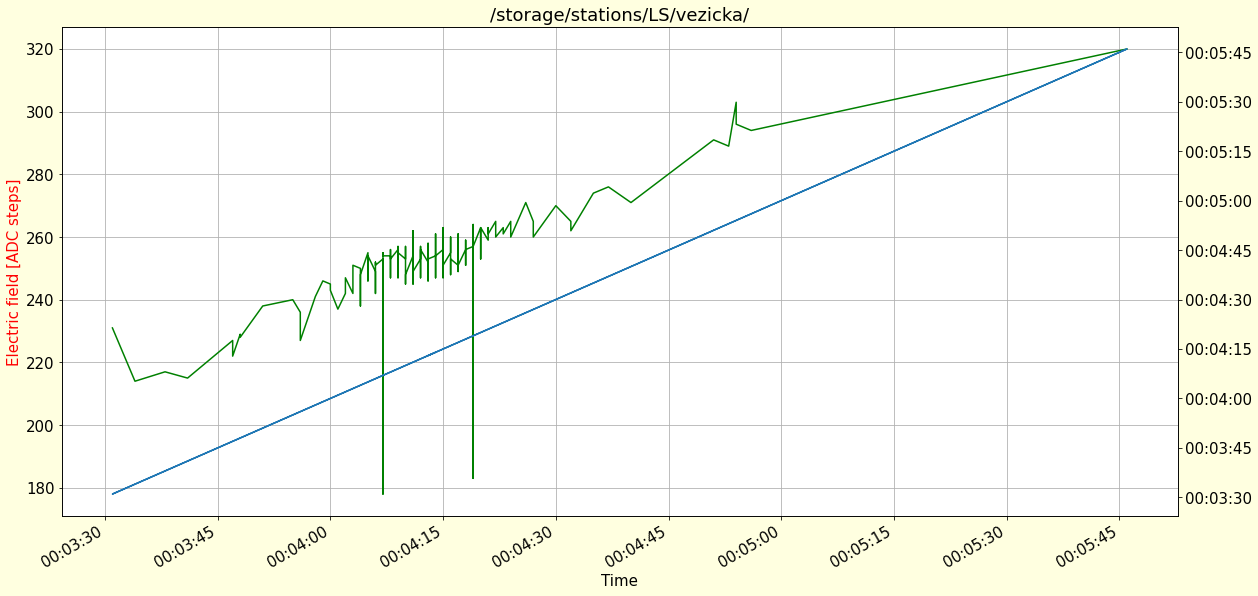

In [17]:
plt.figure(figsize=(20,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})


ftt = glob.iglob(fto+"/**/thundermill1.csv.2023-08-29_*") # generator, search immediate subdirectories 

label = 'THUNDERMILL'
color = 'green'
factor = 0.219 # kV/m 

df = pd.DataFrame()

for f in ftt:
    print(f)
    l=[]
    l.extend(range(0,200))
    
    rdf = pd.read_csv(f, sep=',', header=None, names=l, comment='*', low_memory=False, on_bad_lines='skip')

    
    rdf['field'] = rdf.iloc[:,1:].max(axis=1)
    rdf['field1'] = rdf.iloc[:,1:].min(axis=1)
    rdf['time'] = pd.to_datetime(rdf[0],unit='s')
    rdf.set_index('time', inplace=True, drop=False)
    rdf['field'] = pd.to_numeric(rdf['field'])
    
    df = pd.concat([df, rdf])

((df[125])).plot(label=label, color=color)
#((df['field'])).plot(label=label, color=color)
#((df['field1'])).plot(label=label, color=color)
plt.ylabel('Electric field [ADC steps]', color='red')
plt.title(fto)
#plt.legend(['THUNDERMILL'])
#plt.legend(['UP','DOWN'], labelcolor=['red','blue'], handlelength=0, handletextpad=0, fancybox=True) 
plt.grid()
plt.xlabel('Time')
#plt.ylim(-50,50)
#plt.ylim(230,300)
#plt.xlim('2023-07-19 14:02:00','2023-07-19 14:03:30')

plt.twinx()

plt.plot(df['time'])
#plt.ylim(pd.to_datetime('2023-07-19 14:02:00'),pd.to_datetime('2023-07-19 14:03:00'))

    

In [13]:
df

,0,1,2,3,4,5,6,7,8,9,...,193,194,195,196,197,198,199,field,field1,time
time,,,,,,,,,,,,,,,,,,,,,
1970-01-01 00:04:13,253,254,253,253,253,253,254,253,253,253,...,253,253,253,254,253,254,253,254,253,1970-01-01 00:04:13
1970-01-01 00:04:16,256,249,248,253,256,251,253,248,254,255,...,249,254,256,252,252,254,251,257,248,1970-01-01 00:04:16
1970-01-01 00:04:14,254,254,254,254,254,254,254,254,254,254,...,254,253,253,254,253,254,254,254,253,1970-01-01 00:04:14
1970-01-01 00:04:12,252,249,256,254,249,254,256,252,253,254,...,255,255,255,255,255,255,255,257,249,1970-01-01 00:04:12
1970-01-01 00:04:14,254,254,255,254,255,254,254,254,254,254,...,254,254,254,254,254,254,254,255,253,1970-01-01 00:04:14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970-01-01 00:04:13,253,253,254,254,254,254,253,253,253,253,...,254,253,254,254,253,254,253,254,252,1970-01-01 00:04:13
1970-01-01 00:04:13,253,255,251,252,255,252,254,252,253,254,...,254,254,254,254,254,254,254,256,250,1970-01-01 00:04:13
1970-01-01 00:04:13,253,253,253,254,253,253,253,253,253,253,...,254,254,254,254,254,253,254,254,252,1970-01-01 00:04:13


/tmp/ipykernel_29683/3665114023.py:6: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df.loc[TIME:TIMEEND,1:199].T.plot(legend=None)


Text(0.5, 1.0, '2023-07-25 10:15:00')

<Figure size 1440x720 with 0 Axes>

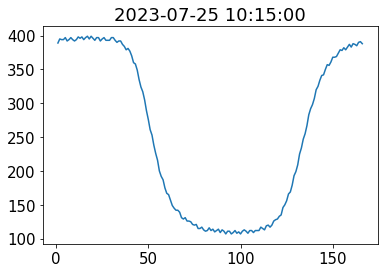

In [178]:
plt.figure(figsize=(20,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})

TIME = '2023-07-25 10:15:00'
TIMEEND = TIME + '.999'
df.loc[TIME:TIMEEND,1:199].T.plot(legend=None)
#df.loc['2023-07-19 14:05:00':'2023-07-19 14:05:01',1:150].T.plot(legend=None)
#df.loc['2023-07-19 14:10:00':'2023-07-19 14:10:01',1:150].T.plot(legend=None)
#df.loc['2023-07-19 14:15:00':'2023-07-19 14:15:01',1:150].T.plot(legend=None)
#df.loc['2023-07-19 14:02:00':'2023-07-19 14:02:19',1:150].T.plot(legend=None, color='blue')
#df.loc['2023-07-19 14:02:20':'2023-07-19 14:02:29',1:150].T.plot(legend=None, color='red')
plt.title(TIME)

/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-25_08
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-25_11
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-25_23
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-25_16
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-25_05
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-25_18
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-25_12
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-25_20
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-25_15
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-25_06
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-25_04
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-25_17
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-25_10
/storage/stations/LS/vezicka/thundermill1/thundermi

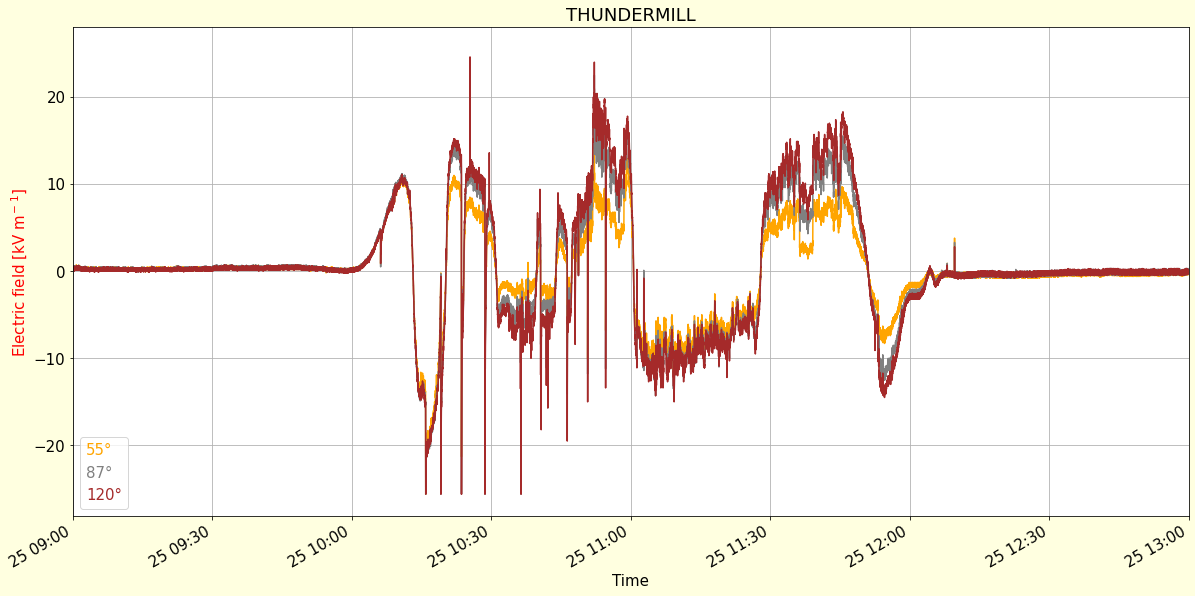

In [8]:
ftt = glob.iglob(fto+"/**/thundermill1.csv."+datum) # generator, search immediate subdirectories 

plt.figure(figsize=(20,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})

for f in ftt:
    print(f)
    l=[]
    l.extend(range(0,200))
    
    df = pd.read_csv(f, sep=',', header=None, names=l, comment='*', low_memory=False, on_bad_lines='skip')

    label = 'THUNDERMILL'
    color = 'green'
    factor = 0.1 # kV/m 
    
    df['field'] = df.iloc[:,1:].max(axis=1)
    df['field1'] = df.iloc[:,1:].min(axis=1)
    df['time'] = pd.to_datetime(df[0],unit='s')
    df.set_index('time', inplace=True, drop=False)
    df['field'] = pd.to_numeric(df['field'])
    
    #((df[125]-256)*factor).plot(label=label, color=color)
    ((df[75]-256)*factor).plot(label=label, color='orange')
    ((df[90]-256)*factor).plot(label=label, color='gray')
    ((df[105]-256)*factor).plot(label=label, color='brown')
    #((df['field']-256)*factor).plot(label=label, color='lightblue')
    #((df['field1']-256)*factor).plot(label=label, color='lightgreen')

plt.ylabel('Electric field [kV m$^-$$^1$]', color='red')
plt.title('THUNDERMILL')
#plt.legend(['THUNDERMILL'])
#plt.legend(['UP','DOWN'], labelcolor=['red','blue'], handlelength=0, handletextpad=0, fancybox=True) 
plt.grid()
plt.xlabel('Time')
#plt.ylim(-100,60)
#plt.ylim(-5,5)
#plt.xlim('2023-07-19 13:00','2023-07-19 15:00')
plt.xlim('2023-07-25 09:00','2023-07-25 13:00')

plt.legend([str(round((360/165)*(75-50)))+'°',str(round((360/165)*(90-50)))+'°',str(round((360/165)*(105-50)))+'°'], loc=3,labelcolor=['orange','gray', 'brown'], handlelength=0, handletextpad=0, fancybox=True) 


In [115]:
ftt = glob.iglob(fto+"/**/mrakomer.csv."+datum) # generator, search immediate subdirectories 

mrakomer = pd.DataFrame()

for f in ftt:
    print(f)
    l=[]
    l.extend(range(0,10))
    
    df = pd.read_csv(f, sep='[ ,]', header=None, names=l, comment='*', on_bad_lines='skip', engine='python')

    label = 'Mrakomer'
    color = 'green'
    
    df['time'] = pd.to_datetime(df[0],unit='s')
    df.set_index('time', inplace=True, drop=False)
    
    mrakomer = pd.concat([mrakomer,df])


/storage/stations/LS/vezicka/mrakomer/mrakomer.csv.2023-08-30_06
/storage/stations/LS/vezicka/mrakomer/mrakomer.csv.2023-08-30_15
/storage/stations/LS/vezicka/mrakomer/mrakomer.csv.2023-08-30_18
/storage/stations/LS/vezicka/mrakomer/mrakomer.csv.2023-08-30_12
/storage/stations/LS/vezicka/mrakomer/mrakomer.csv.2023-08-30_20
/storage/stations/LS/vezicka/mrakomer/mrakomer.csv.2023-08-30_01
/storage/stations/LS/vezicka/mrakomer/mrakomer.csv.2023-08-30_05
/storage/stations/LS/vezicka/mrakomer/mrakomer.csv.2023-08-30_16
/storage/stations/LS/vezicka/mrakomer/mrakomer.csv.2023-08-30_11
/storage/stations/LS/vezicka/mrakomer/mrakomer.csv.2023-08-30_23
/storage/stations/LS/vezicka/mrakomer/mrakomer.csv.2023-08-30_08
/storage/stations/LS/vezicka/mrakomer/mrakomer.csv.2023-08-30_02
/storage/stations/LS/vezicka/mrakomer/mrakomer.csv.2023-08-30_00
/storage/stations/LS/vezicka/mrakomer/mrakomer.csv.2023-08-30_13
/storage/stations/LS/vezicka/mrakomer/mrakomer.csv.2023-08-30_19
/storage/stations/LS/vezi

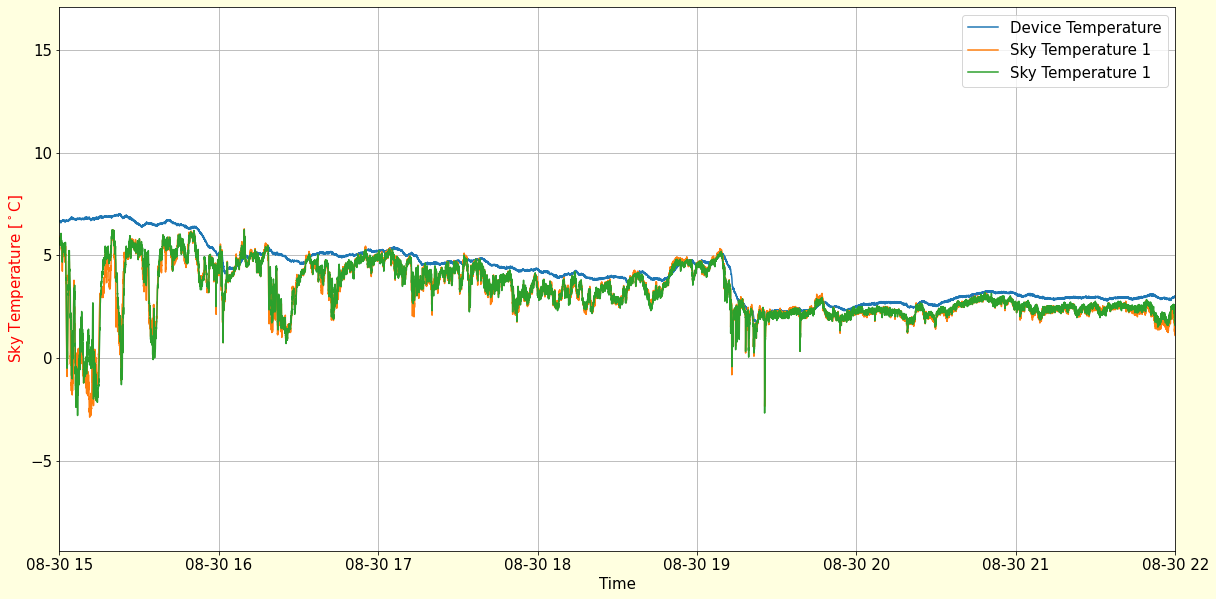

In [118]:
mrakomer = mrakomer.sort_index()

plt.figure(figsize=(20,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})

plt.plot(mrakomer[3]/100, label='Device Temperature')
plt.plot(mrakomer[4]/100, label='Sky Temperature 1')
plt.plot(mrakomer[5]/100, label='Sky Temperature 1')

plt.ylabel('Sky Temperature [$^\circ$C]', color='red')
plt.grid()
plt.xlabel('Time')
#plt.ylim(-100,60)
#plt.ylim(-5,5)
#plt.xlim('2023-07-19 13:00','2023-07-19 15:00')
#plt.xlim(pd.to_datetime('2023-07-25 09:00'),pd.to_datetime('2023-07-25 13:00'))
plt.xlim(pd.to_datetime('2023-08-30 15:00'),pd.to_datetime('2023-08-30 22:00'))

plt.legend()


# SEVAN

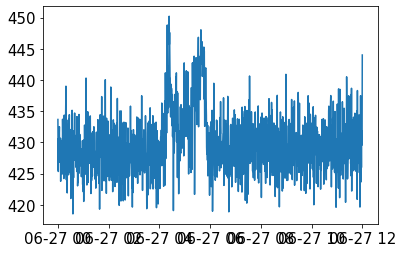

In [301]:
f = './SEVAN202406272.csv'
f = './SEVAN20240627.csv'
#f = './SEVAN20240511.csv'
#f = './SEVAN20240701.csv'

l=[]
l.extend(range(0,2))

dfs = pd.read_csv(f, delim_whitespace=True, header=None, comment='*', skiprows=1, on_bad_lines='skip', engine='python')

dfs['time']=pd.to_datetime(dfs[0]+' '+dfs[1])
dfs = dfs.set_index('time')
plt.plot(dfs[2])



In [20]:
dfs

0         1
2024-06-27 00:00:00  433.6667  2.128700
           00:00:30  425.6000  2.124833
           00:01:00  425.3333  2.123200
           00:01:30  430.6667  2.128100
           00:02:00  428.1333  2.122933
...                       ...       ...
           11:57:30  425.9667  2.336500
           11:58:00  431.2000  2.572800
           11:58:30  431.8000  2.515633
           11:59:00  429.5667  2.458767
           11:59:30  444.0000  2.322000

[1440 rows x 2 columns]

/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-25_08
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-25_11
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-25_23
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-25_16
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-25_05
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-25_18
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-25_12
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-25_20
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-25_15
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-25_06
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-25_04
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-25_17
/storage/stations/LS/vezicka/thundermill1/thundermill1.csv.2023-07-25_10
/storage/stations/LS/vezicka/thundermill1/thundermi

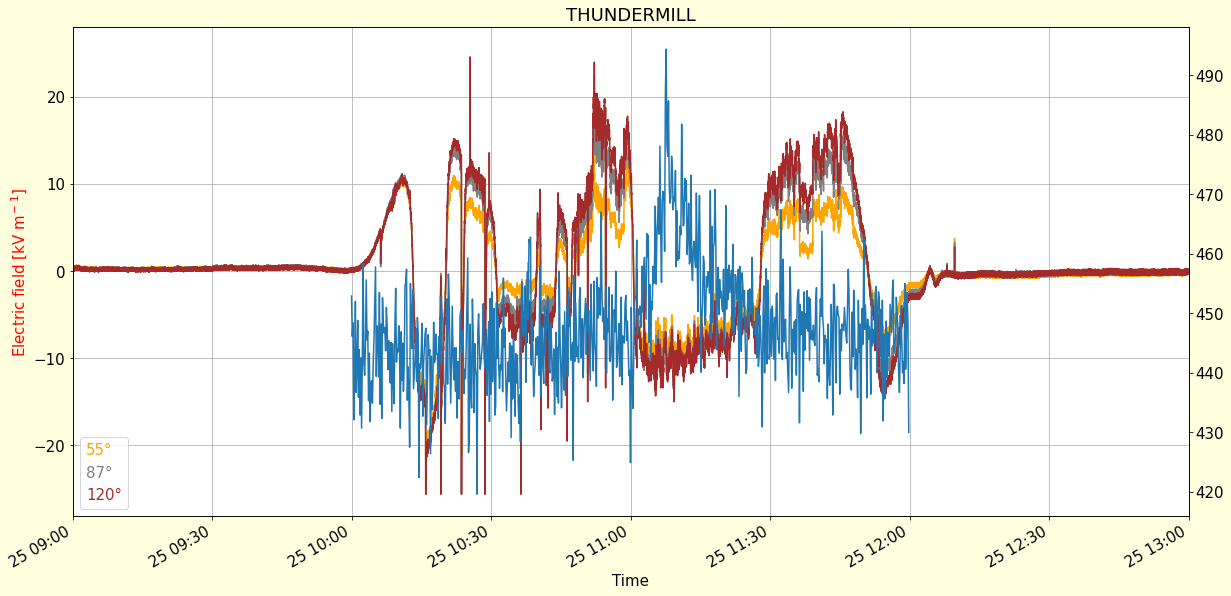

In [83]:
ftt = glob.iglob(fto+"/**/thundermill1.csv."+datum) # generator, search immediate subdirectories 

plt.figure(figsize=(20,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})


for f in ftt:
    print(f)
    l=[]
    l.extend(range(0,200))
    
    df = pd.read_csv(f, sep=',', header=None, names=l, comment='*', low_memory=False, on_bad_lines='skip')

    label = 'THUNDERMILL'
    color = 'green'
    factor = 0.1 # kV/m 
    
    df['field'] = df.iloc[:,1:].max(axis=1)
    df['field1'] = df.iloc[:,1:].min(axis=1)
    df['time'] = pd.to_datetime(df[0],unit='s')
    df.set_index('time', inplace=True, drop=False)
    df['field'] = pd.to_numeric(df['field'])
    
    #((df[125]-256)*factor).plot(label=label, color=color)
    ((df[75]-256)*factor).plot(label=label, color='orange')
    ((df[90]-256)*factor).plot(label=label, color='gray')
    ((df[105]-256)*factor).plot(label=label, color='brown')
    #((df['field']-256)*factor).plot(label=label, color='lightblue')
    #((df['field1']-256)*factor).plot(label=label, color='lightgreen')



plt.ylabel('Electric field [kV m$^-$$^1$]', color='red')
plt.title('THUNDERMILL')
#plt.legend(['THUNDERMILL'])
#plt.legend(['UP','DOWN'], labelcolor=['red','blue'], handlelength=0, handletextpad=0, fancybox=True) 
plt.grid()
plt.xlabel('Time')
#plt.ylim(-100,60)
#plt.ylim(-5,5)
#plt.xlim('2023-07-19 13:00','2023-07-19 15:00')
plt.xlim('2023-07-25 09:00','2023-07-25 13:00')

plt.legend([str(round((360/165)*(75-50)))+'°',str(round((360/165)*(90-50)))+'°',str(round((360/165)*(105-50)))+'°'], loc=3,labelcolor=['orange','gray', 'brown'], handlelength=0, handletextpad=0, fancybox=True) 


plt.twinx()

f = '/storage/stations/LS/SEVAN/2023_07_25.txt'

l=[]
l.extend(range(0,4))

df = pd.read_csv(f, delim_whitespace=True, header=None, names=l, comment='*', on_bad_lines='skip', engine='python',index_col=False)
df['time']=pd.to_datetime(df[0]+' '+df[1])
df = df.set_index(df['time'])
plt.plot(df[2])



/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-07-25_17
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-07-25_04
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-07-25_09
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-07-25_22
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-07-25_10
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-07-25_14
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-07-25_07
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-07-25_00
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-07-25_21
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-07-25_13
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-07-25_19
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-07-25_23
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-07-25_11
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-07-25_08
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-07-25_02
/storage/stations/LS/vezi

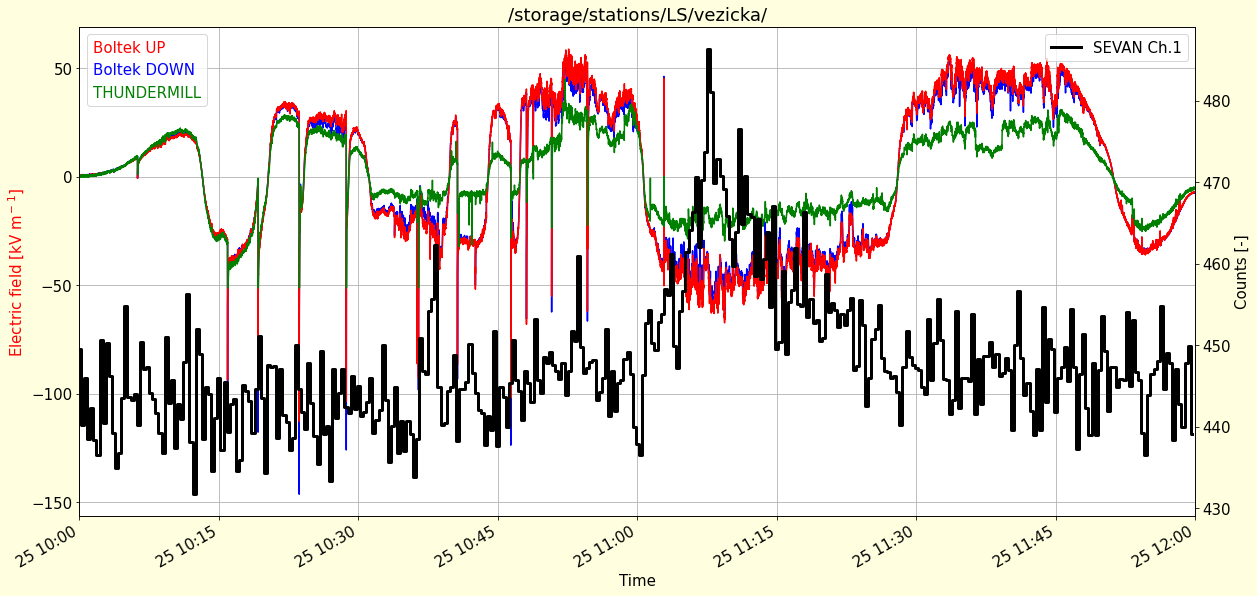

In [11]:
fto = '/storage/stations/LS/vezicka/'
datum = '2023-08-29*'
datum = '2023-07-25*'
#datum = '2023-07-19*'

ftt = glob.iglob(fto+"/**/efm*.csv."+datum) # generator, search immediate subdirectories 

plt.figure(figsize=(20,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})

for f in ftt:
    print(f)
    l=[]
    l.extend(range(0,4))
    
    df = pd.read_csv(f, sep=',', header=None, names=l, comment='*', low_memory=False, on_bad_lines='skip')

    if 'up' in f:
        label = 'UP'
        color = 'red'
        factor = 10
    else:
        label = 'DOWN'
        color = 'blue'
        factor = 10
   
    
    df['field'] = df[1].str.replace('$', '', regex=False)
    df['time'] = pd.to_datetime(df[0],unit='s')
    df.set_index('time', inplace=True, drop=False)
    df['field'] = pd.to_numeric(df['field'], errors='coerce')
    
    (df['field']*factor).plot(label=label, color=color)

plt.ylabel('Electric field [kV m$^-$$^1$]', color='red')
plt.title(fto)
#plt.legend()
#plt.legend(['UP','DOWN'], labelcolor=['red','blue'], handlelength=0, handletextpad=0, fancybox=True) 
plt.grid()
plt.xlabel('Time')
#plt.ylim(-50,50)
#plt.ylim(-2,2)

ftt = glob.iglob(fto+"/**/thundermill1.csv."+datum) # generator, search immediate subdirectories 

for f in ftt:
    print(f)
    l=[]
    l.extend(range(0,200))
    
    df = pd.read_csv(f, sep=',', header=None, names=l, comment='*', low_memory=False, on_bad_lines='skip')

    label = 'THUNDERMILL'
    color = 'green'
    factor = 0.2 # kV/m 
    
    df['field'] = df.iloc[:,1:].max(axis=1)
    df['field1'] = df.iloc[:,1:].min(axis=1)
    df['time'] = pd.to_datetime(df[0],unit='s')
    df.set_index('time', inplace=True, drop=False)
    df['field'] = pd.to_numeric(df['field'])
    
    #((df[125]-256)*factor).plot(label=label, color=color)
    ((df[90]-256)*factor).plot(label=label, color=color)
    #((df['field']-256)*factor).plot(label=label, color='darkgreen')
    #((df['field1']-256)*factor).plot(label=label, color='lightgreen')

plt.ylabel('Electric field [kV m$^-$$^1$]', color='red')
plt.title(fto)
#plt.legend(['THUNDERMILL'])
#plt.legend(['UP','DOWN'], labelcolor=['red','blue'], handlelength=0, handletextpad=0, fancybox=True) 
plt.grid()
plt.xlabel('Time')
#plt.ylim(-100,60)
#plt.ylim(-5,5)
#plt.xlim('2023-07-19 13:00','2023-07-19 15:00')
plt.xlim('2023-07-25 10:00','2023-07-25 12:00')
#plt.xlim('2023-07-25 15:00','2023-07-25 18:00')
#plt.xlim('2023-08-29 00:00','2023-08-29 23:00')

plt.legend(['Boltek UP','Boltek DOWN', 'THUNDERMILL'], loc=2,labelcolor=['red','blue', 'green'], handlelength=0, handletextpad=0, fancybox=True) 

plt.twinx()

f = '/storage/stations/LS/SEVAN/2023_07_25.txt'

l=[]
l.extend(range(0,4))

df = pd.read_csv(f, delim_whitespace=True, header=None, names=l, comment='*', on_bad_lines='skip', engine='python',index_col=False)
df['time']=pd.to_datetime(df[0]+' '+df[1])
df = df.set_index(df['time'])
plt.plot(df[2].resample('20s').mean(), label='SEVAN Ch.1', linewidth=3,  drawstyle='steps-mid', color='black')
plt.ylabel('Counts [-]', color='black')

plt.legend()

/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-07-25_17
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-07-25_04
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-07-25_09
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-07-25_22
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-07-25_10
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-07-25_14
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-07-25_07
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-07-25_00
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-07-25_21
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-07-25_13
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-07-25_19
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-07-25_23
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-07-25_11
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-07-25_08
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-07-25_02
/storage/stations/LS/vezi

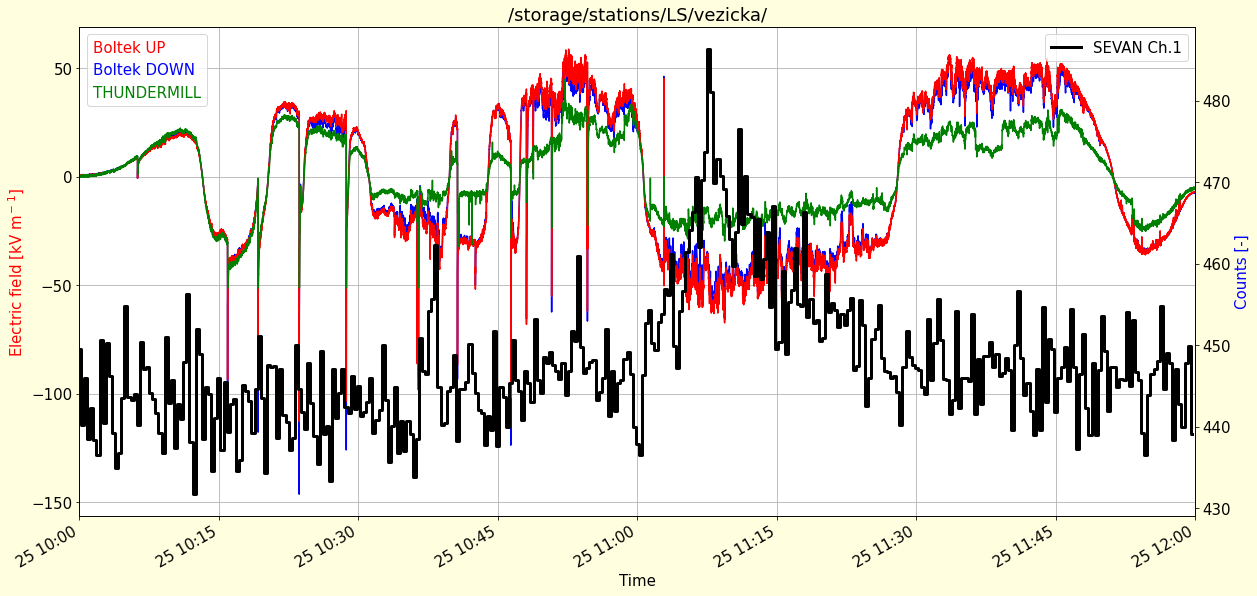

In [4]:
fto = '/storage/stations/LS/vezicka/'
datum = '2023-08-29*'
datum = '2023-07-25*'
#datum = '2023-07-19*'

ftt = glob.iglob(fto+"/**/efm*.csv."+datum) # generator, search immediate subdirectories 

plt.figure(figsize=(20,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})

dfbd = pd.DataFrame()
dfbu = pd.DataFrame()

for f in ftt:
    print(f)
    l=[]
    l.extend(range(0,4))
    
    df = pd.read_csv(f, sep=',', header=None, names=l, comment='*', low_memory=False, on_bad_lines='skip')
    
    if 'up' in f:
        label = 'UP'
        color = 'red'
        factor = 10
    else:
        label = 'DOWN'
        color = 'blue'
        factor = 10

    df['field'] = df[1].str.replace('$', '', regex=False)
    df['time'] = pd.to_datetime(df[0],unit='s')
    df.set_index('time', inplace=True, drop=False)
    df['field'] = pd.to_numeric(df['field'], errors='coerce')
    
    df['field'] = df['field']*factor
    
    if 'up' in f:
        dfbu = pd.concat([dfbu, df])
    else:
        dfbd = pd.concat([dfbd, df])

dfbd.sort_index(inplace=True)
(dfbd['field']).plot(label='Boltek down', color='blue')
dfbu.sort_index(inplace=True)
(dfbu['field']).plot(label='Boltek up', color='red')

plt.ylabel('Electric field [kV m$^-$$^1$]', color='red')
plt.title(fto)
#plt.legend()
#plt.legend(['UP','DOWN'], labelcolor=['red','blue'], handlelength=0, handletextpad=0, fancybox=True) 
plt.grid()
plt.xlabel('Time')
#plt.ylim(-50,50)
#plt.ylim(-2,2)

ftt = glob.iglob(fto+"/**/thundermill1.csv."+datum) # generator, search immediate subdirectories 

dft = pd.DataFrame()

for f in ftt:
    print(f)
    l=[]
    l.extend(range(0,200))
    
    df = pd.read_csv(f, sep=',', header=None, names=l, comment='*', low_memory=False, on_bad_lines='skip')

    label = 'THUNDERMILL'
    color = 'green'
    factor = 0.2 # kV/m 
    
    df['time'] = pd.to_datetime(df[0],unit='s')
    df.set_index('time', inplace=True, drop=False)
    df['field'] = (df[90]-256)*factor
    
    dft = pd.concat([dft, df])
    
    
(dft['field']).plot(label=label, color=color)

plt.ylabel('Electric field [kV m$^-$$^1$]', color='red')
plt.title(fto)
#plt.legend(['THUNDERMILL'])
#plt.legend(['UP','DOWN'], labelcolor=['red','blue'], handlelength=0, handletextpad=0, fancybox=True) 
plt.grid()
plt.xlabel('Time')
#plt.ylim(-100,60)
#plt.ylim(-5,5)
#plt.xlim('2023-07-19 13:00','2023-07-19 15:00')
plt.xlim('2023-07-25 10:00','2023-07-25 12:00')
#plt.xlim('2023-07-25 15:00','2023-07-25 18:00')
#plt.xlim('2023-08-29 00:00','2023-08-29 23:00')

plt.legend(['Boltek UP','Boltek DOWN', 'THUNDERMILL'], loc=2,labelcolor=['red','blue', 'green'], handlelength=0, handletextpad=0, fancybox=True) 

plt.twinx()

f = '/storage/stations/LS/SEVAN/2023_07_25.txt'

l=[]
l.extend(range(0,4))

dfs = pd.read_csv(f, delim_whitespace=True, header=None, names=l, comment='*', on_bad_lines='skip', engine='python',index_col=False)
dfs['time']=pd.to_datetime(dfs[0]+' '+dfs[1])
dfs = dfs.set_index(dfs['time'])
plt.plot(dfs[2].resample('20s').mean(), label='SEVAN Ch.1', linewidth=3,  drawstyle='steps-mid', color='black')
plt.ylabel('Counts [-]', color='blue')

plt.legend()

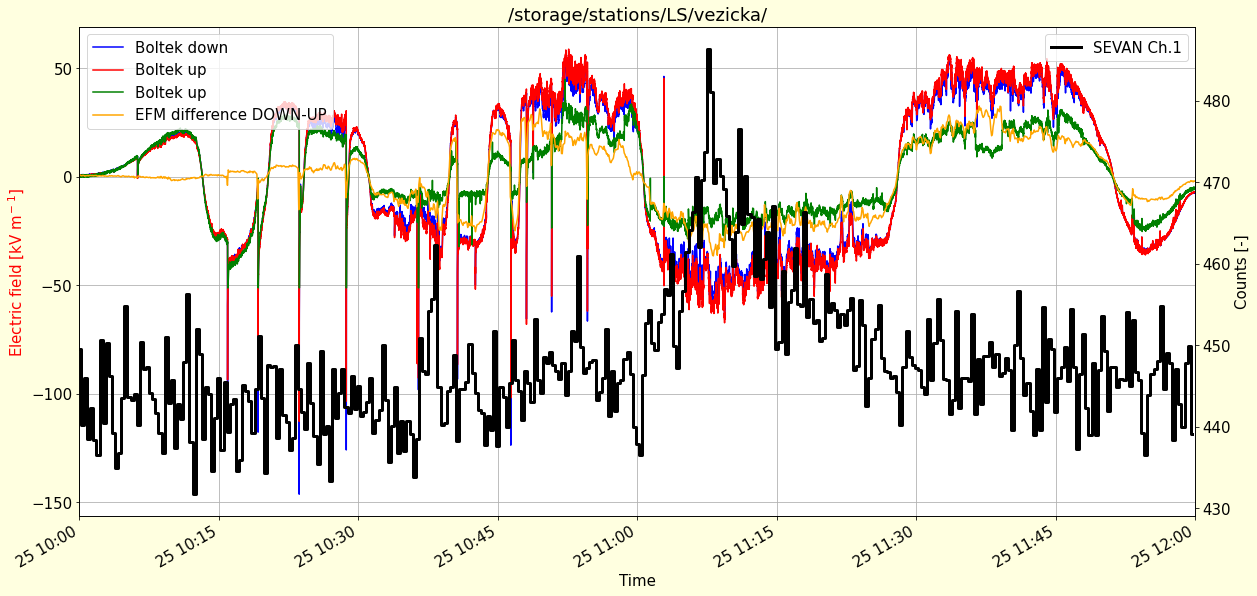

In [33]:
plt.figure(figsize=(20,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})

dfbd.sort_index(inplace=True)
(dfbd['field']).plot(label='Boltek down', color='blue')
dfbu.sort_index(inplace=True)
(dfbu['field']).plot(label='Boltek up', color='red')
dft.sort_index(inplace=True)
(dft['field']).plot(label='Boltek up', color='green')

(dfbd['field'].resample('5s').mean() - dft['field'].resample('5s').mean()).plot(label='EFM difference DOWN-UP', color='orange')

plt.legend(loc=2)

plt.ylabel('Electric field [kV m$^-$$^1$]', color='red')
plt.title(fto)
plt.grid()
plt.xlabel('Time')
plt.xlim('2023-07-25 10:00','2023-07-25 12:00')

plt.twinx()

plt.plot(dfs[2].resample('20s').mean(), label='SEVAN Ch.1', linewidth=3,  drawstyle='steps-mid', color='black')
plt.ylabel('Counts [-]', color='black')

plt.legend()

[None, None]

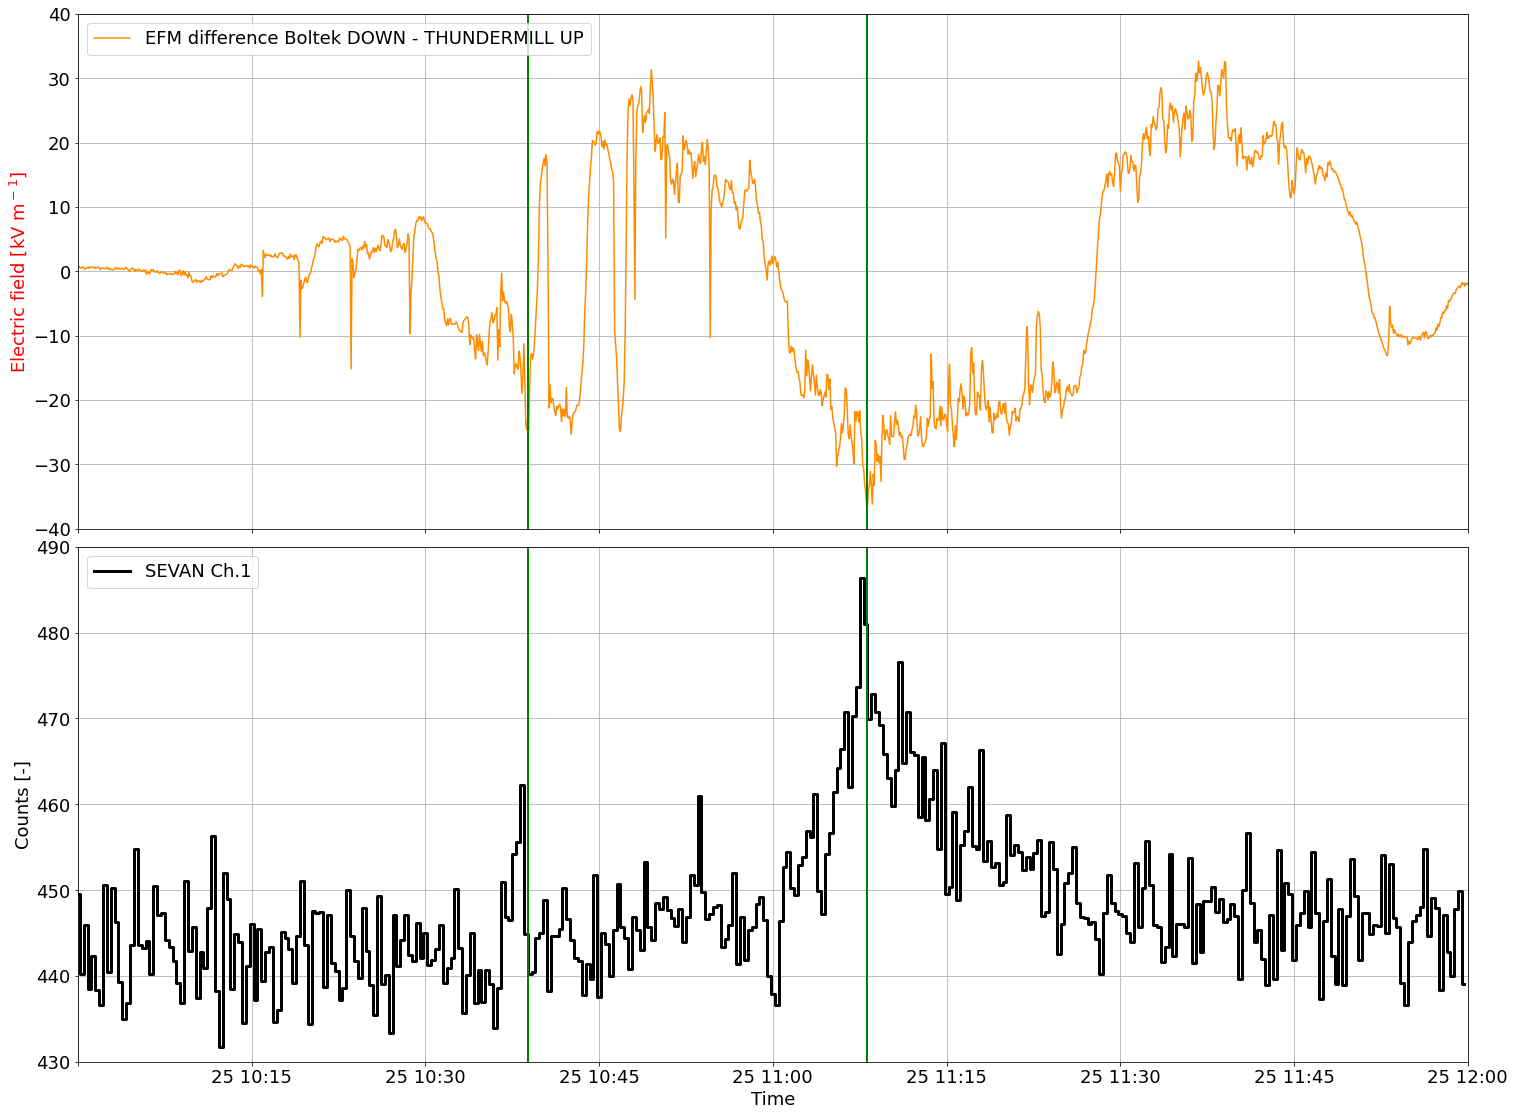

In [13]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(20,15))
matplotlib.rcParams.update({'font.size': 18})
fig.tight_layout(pad=0.0)


ax1.plot((dfbd['field'].resample('5s').mean() - dft['field'].resample('5s').mean()), label='EFM difference Boltek DOWN - THUNDERMILL UP', color='darkorange')

ax1.set_ylabel('Electric field [kV m$^-$$^1$]', color='red')
#ax1.set_title(fto)
ax1.grid()
ax1.set_xlim(pd.to_datetime('2023-07-25 10:00'),pd.to_datetime('2023-07-25 12:00'))
ax1.legend(loc=2)


ax2.plot(dfs[2].resample('20s').mean(), label='SEVAN Ch.1', linewidth=3,  drawstyle='steps-mid', color='black')
ax2.set_ylabel('Counts [-]', color='black')
ax2.grid()
ax2.set_xlabel('Time')
ax2.legend(loc=2)

ax1.vlines(x=pd.to_datetime('2023-07-25 10:38:50'), ymin=-40, ymax=40, colors='green', lw=2, label='max1')
ax2.vlines(x=pd.to_datetime('2023-07-25 10:38:50'), ymin=429, ymax=500, colors='green', lw=2, label='max1')
ax1.vlines(x=pd.to_datetime('2023-07-25 11:08:09'), ymin=-40, ymax=40, colors='green', lw=2, label='max1')
ax2.vlines(x=pd.to_datetime('2023-07-25 11:08:09'), ymin=429, ymax=500, colors='green', lw=2, label='max2')
ax1.set_ylim(-40,40)
ax2.set_ylim(430,490)

plt.setp(ax2.get_xticklabels()[0], visible=False) 


(430.0, 490.0)

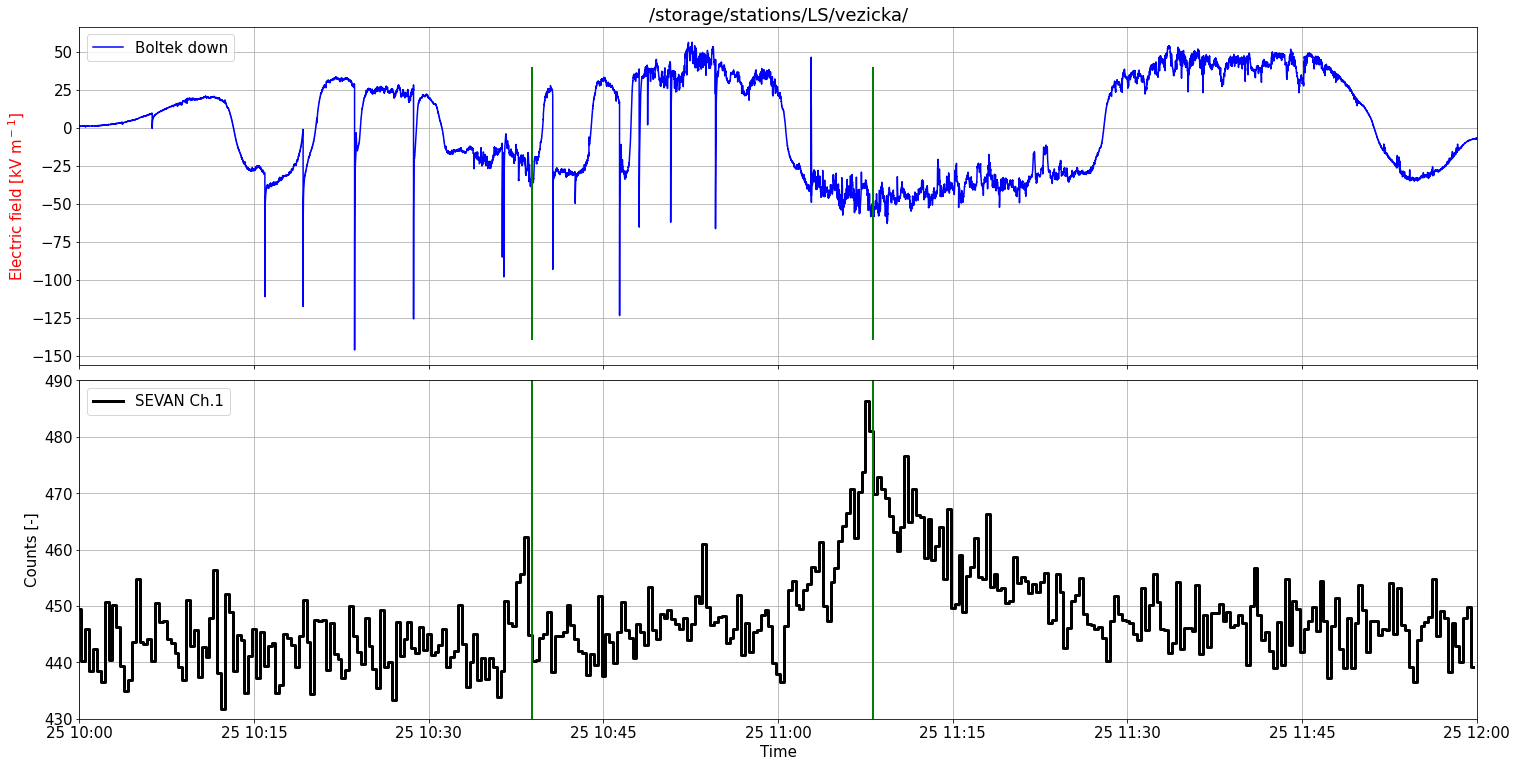

In [67]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(20,10))
matplotlib.rcParams.update({'font.size': 15})
fig.tight_layout(pad=0.0)


ax1.plot((dfbd['field']), label='Boltek down', color='blue')

ax1.set_ylabel('Electric field [kV m$^-$$^1$]', color='red')
ax1.set_title(fto)
ax1.grid()
ax1.set_xlim(pd.to_datetime('2023-07-25 10:00'),pd.to_datetime('2023-07-25 12:00'))
ax1.legend(loc=2)


ax2.plot(dfs[2].resample('20s').mean(), label='SEVAN Ch.1', linewidth=3,  drawstyle='steps-mid', color='black')
ax2.set_ylabel('Counts [-]', color='black')
ax2.grid()
ax2.set_xlabel('Time')
ax2.legend(loc=2)

ax1.vlines(x=pd.to_datetime('2023-07-25 10:38:50'), ymin=-140, ymax=40, colors='green', lw=2, label='max1')
ax2.vlines(x=pd.to_datetime('2023-07-25 10:38:50'), ymin=429, ymax=500, colors='green', lw=2, label='max1')
ax1.vlines(x=pd.to_datetime('2023-07-25 11:08:09'), ymin=-140, ymax=40, colors='green', lw=2, label='max1')
ax2.vlines(x=pd.to_datetime('2023-07-25 11:08:09'), ymin=429, ymax=500, colors='green', lw=2, label='max2')
#ax1.set_ylim(-40,40)
ax2.set_ylim(430,490)


/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-08-30_07
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-08-30_14
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-08-30_19
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-08-30_13
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-08-30_21
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-08-30_00
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-08-30_04
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-08-30_17
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-08-30_10
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-08-30_22
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-08-30_09
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-08-30_03
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-08-30_01
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-08-30_12
/storage/stations/LS/vezicka/efm_down/efm_down.csv.2023-08-30_18
/storage/stations/LS/vezi

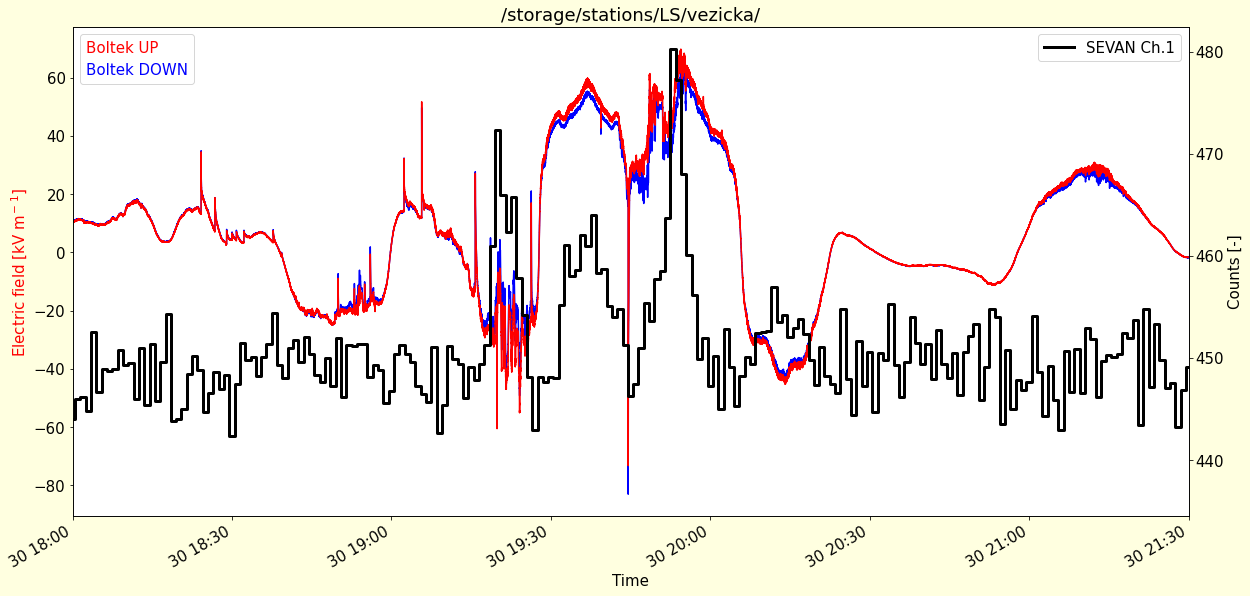

In [122]:
fto = '/storage/stations/LS/vezicka/'
datum = '2023-08-29*'
datum = '2023-07-25*'
#datum = '2023-07-19*'
datum = '2023-08-30*'

ftt = glob.iglob(fto+"/**/efm*.csv."+datum) # generator, search immediate subdirectories 

plt.figure(figsize=(20,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})

for f in ftt:
    print(f)
    l=[]
    l.extend(range(0,4))
    
    df = pd.read_csv(f, sep=',', header=None, names=l, comment='*', low_memory=False, on_bad_lines='skip')

    if 'up' in f:
        label = 'UP'
        color = 'red'
        factor = 10
    else:
        label = 'DOWN'
        color = 'blue'
        factor = 10
   
    
    df['field'] = df[1].str.replace('$', '', regex=False)
    df['time'] = pd.to_datetime(df[0],unit='s')
    df.set_index('time', inplace=True, drop=False)
    df['field'] = pd.to_numeric(df['field'], errors='coerce')
    
    (df['field']*factor).plot(label=label, color=color)

plt.ylabel('Electric field [kV m$^-$$^1$]', color='red')
plt.title(fto)
#plt.legend()
#plt.legend(['UP','DOWN'], labelcolor=['red','blue'], handlelength=0, handletextpad=0, fancybox=True) 
plt.grid()
plt.xlabel('Time')
#plt.ylim(-50,50)
#plt.ylim(-2,2)

'''
ftt = glob.iglob(fto+"/**/thundermill1.csv."+datum) # generator, search immediate subdirectories 

for f in ftt:
    print(f)
    l=[]
    l.extend(range(0,200))
    
    df = pd.read_csv(f, sep=',', header=None, names=l, comment='*', low_memory=False, on_bad_lines='skip')

    label = 'THUNDERMILL'
    color = 'green'
    factor = 0.2 # kV/m 
    
    df['field'] = df.iloc[:,1:].max(axis=1)
    df['field1'] = df.iloc[:,1:].min(axis=1)
    df['time'] = pd.to_datetime(df[0],unit='s')
    df.set_index('time', inplace=True, drop=False)
    df['field'] = pd.to_numeric(df['field'])
    
    #((df[125]-256)*factor).plot(label=label, color=color)
    ((df[90]-256)*factor).plot(label=label, color=color)
    #((df['field']-256)*factor).plot(label=label, color='darkgreen')
    #((df['field1']-256)*factor).plot(label=label, color='lightgreen')

plt.ylabel('Electric field [kV m$^-$$^1$]', color='red')
plt.title(fto)
#plt.legend(['THUNDERMILL'])
#plt.legend(['UP','DOWN'], labelcolor=['red','blue'], handlelength=0, handletextpad=0, fancybox=True) 
'''
plt.grid()
plt.xlabel('Time')
#plt.ylim(-100,60)
#plt.ylim(-5,5)
#plt.xlim('2023-07-19 13:00','2023-07-19 15:00')
##plt.xlim('2023-07-25 10:00','2023-07-25 12:00')
#plt.xlim('2023-07-25 15:00','2023-07-25 18:00')
plt.xlim('2023-08-30 15:00','2023-08-30 22:00')
plt.xlim('2023-08-30 18:00','2023-08-30 21:30')

plt.legend(['Boltek UP','Boltek DOWN'], loc=2,labelcolor=['red','blue'], handlelength=0, handletextpad=0, fancybox=True) 

plt.twinx()

f = '/storage/stations/LS/SEVAN/2023_08_30.txt'

l=[]
l.extend(range(0,4))

df = pd.read_csv(f, delim_whitespace=True, header=None, names=l, comment='*', on_bad_lines='skip', engine='python',index_col=False)
df['time']=pd.to_datetime(df[0]+' '+df[1])
df = df.set_index(df['time'])
#plt.plot(df[2].resample('20s').mean(), label='SEVAN Ch.1', ls='-', linewidth=2,  drawstyle='steps-mid')
plt.plot(df[2], label='SEVAN Ch.1', ls='-', linewidth=3,  drawstyle='steps-mid', color='black')
#plt.plot(df[2], label='SEVAN Ch.1')
plt.ylabel('Counts [-]', color='black')

plt.legend()

# BOLTEK DOWN, THUNDERMILL DOWN, THUNDERMILL_UP

/storage/stations/LS/vezicka/thundermill_up/thundermill_up.csv.2024-06-27_12
/storage/stations/LS/vezicka/thundermill_up/thundermill_up.csv.2024-06-27_18
/storage/stations/LS/vezicka/thundermill_up/thundermill_up.csv.2024-06-27_20
/storage/stations/LS/vezicka/thundermill_up/thundermill_up.csv.2024-06-27_01
/storage/stations/LS/vezicka/thundermill_up/thundermill_up.csv.2024-06-27_06
/storage/stations/LS/vezicka/thundermill_up/thundermill_up.csv.2024-06-27_15
/storage/stations/LS/vezicka/thundermill_up/thundermill_up.csv.2024-06-27_11
/storage/stations/LS/vezicka/thundermill_up/thundermill_up.csv.2024-06-27_23
/storage/stations/LS/vezicka/thundermill_up/thundermill_up.csv.2024-06-27_02
/storage/stations/LS/vezicka/thundermill_up/thundermill_up.csv.2024-06-27_08
/storage/stations/LS/vezicka/thundermill_up/thundermill_up.csv.2024-06-27_05
/storage/stations/LS/vezicka/thundermill_up/thundermill_up.csv.2024-06-27_16
/storage/stations/LS/vezicka/thundermill_up/thundermill_up.csv.2024-06-27_14

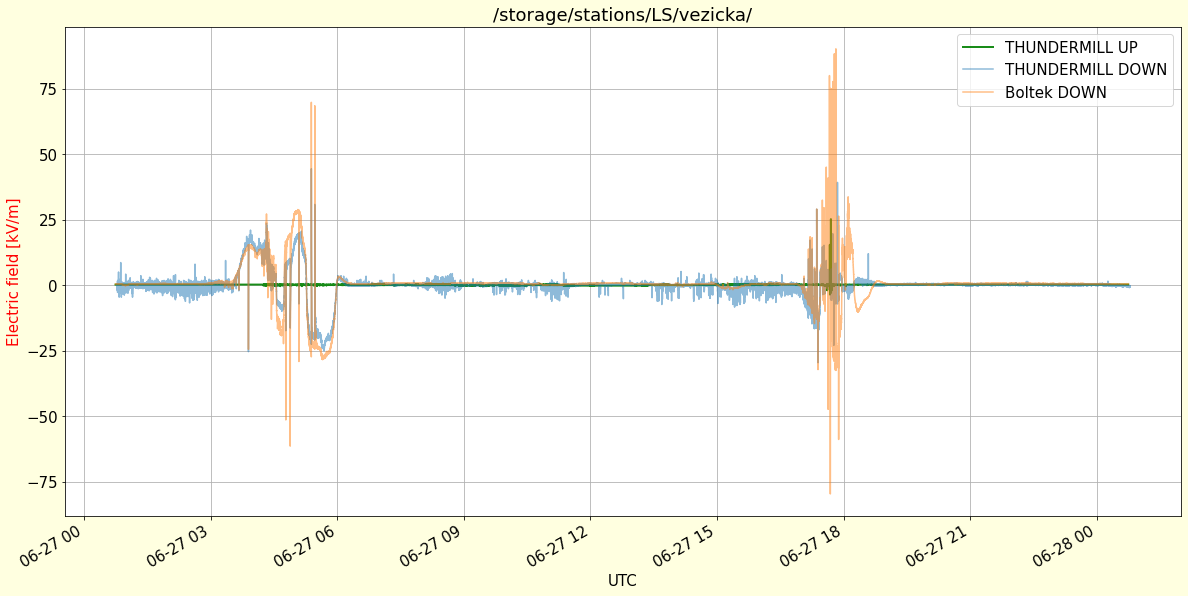

In [348]:
plt.figure(figsize=(20,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})

fto = '/storage/stations/LS/vezicka/'
selection = '2024-04-20_*'
selection = '2024-05-24_*' # Nasobny Megaevent
#selection = '2024-05-11_*' # Polarni zare
selection = '2024-06-28_*' # Nekolik TGF za sebou
#selection = '2024-05-14_*' 
selection = '2024-06-27_*' 
#selection = '2024-07-01_*' 

ftt = glob.iglob(fto+"/**/thundermill_up.csv."+selection) # generator, search immediate subdirectories 

label = 'THUNDERMILL UP'
color = 'green'
factor = 0.2 # kV/m . DIV 

dftu = pd.DataFrame()

for f in ftt:
    print(f)
    l=[]
    l.extend(range(0,203))
    
    rdf = pd.read_csv(f, sep=',', header=None, names=l, comment='#', low_memory=False, on_bad_lines='skip')

    '''
    if max(rdf[100])<256:
        rdf['field'] = rdf.iloc[:,1:].max(axis=1)
    else:
        rdf['field'] = rdf.iloc[:,1:].min(axis=1)
    '''    
    
    #rdf['field1'] = rdf.iloc[:,1:].min(axis=1)
    rdf['time'] = pd.to_datetime(rdf[0],unit='s')
    rdf.set_index('time', inplace=True, drop=False)
    rdf['field'] = pd.to_numeric(rdf[120])
    rdf['field'] = ((rdf['field'])-258) * factor
    
    dftu = pd.concat([dftu, rdf])

dftu.sort_index(inplace=True)
(dftu['field']).plot(label=label, color=color, lw=2, alpha=0.9)
#((df['field'])).plot(label=label, color=color)
#((df['field1'])).plot(label=label, color=color)
plt.ylabel('Electric field [ADC steps]', color='red')
plt.title(fto)
plt.grid()
plt.xlabel('Time')
#plt.ylim(-50,50)
#plt.xlim('2023-07-19 14:02:00','2023-07-19 14:03:30')


ftt = glob.iglob(fto+"/**/thundermill_down.csv."+selection) # generator, search immediate subdirectories 

label = 'THUNDERMILL DOWN'
color = 'brown'
factor = 0.2 # kV/m . DIV 

dftd = pd.DataFrame()

for f in ftt:
    print(f)
    l=[]
    l.extend(range(0,200))
    
    #rdf = pd.read_csv(f, sep=',', header=None, names=l, comment='*', low_memory=False, on_bad_lines='skip')
    rdf = pd.read_csv(f, sep=',', header=None, comment='*', low_memory=False, on_bad_lines='skip')

    '''
    if max(rdf[50])<262:
        rdf['field'] = rdf.iloc[:,1:].max(axis=1)
    else:
        rdf['field'] = rdf.iloc[:,1:].min(axis=1)
    '''
    #rdf['field'] = rdf.iloc[:,1:].min(axis=1)
    #rdf['field1'] = rdf.iloc[:,1:].min(axis=1)
    rdf['time'] = pd.to_datetime(rdf[0],unit='s')
    rdf.set_index('time', inplace=True, drop=False)
    rdf['field'] = pd.to_numeric(rdf[100])
    #rdf['field'] = pd.to_numeric(rdf[40])
    rdf['field'] = -((rdf['field'])-250) * factor
    rdf['field2'] = pd.to_numeric(rdf[70])
    #rdf['field2'] = pd.to_numeric(rdf[20])
    rdf['field2'] = -((rdf['field2'])-250) * factor
    
    dftd = pd.concat([dftd, rdf])

dftd.sort_index(inplace=True)
(dftd['field']).plot(label=label, alpha=0.5)
#(dftd['field2']).plot(label=label, alpha=0.5)
#((df['field'])).plot(label=label, color=color)
#((df['field1'])).plot(label=label, color=color)
plt.ylabel('Electric field [ADC steps]', color='red')
plt.title(fto)
plt.grid()
plt.xlabel('Time')
#plt.ylim(-50,50)
#plt.xlim('2023-07-19 14:02:00','2023-07-19 14:03:30')

ftt = glob.iglob(fto+"/**/efm_down.csv."+selection) # generator, search immediate subdirectories 

label = 'Boltek DOWN'
color = 'blue'
factor = 5.4

dfbd = pd.DataFrame()

for f in ftt:
    print(f)
    l=[]
    l.extend(range(0,4))
    
    df = pd.read_csv(f, sep=',', header=None, names=l, comment='*', low_memory=False, on_bad_lines='skip')
    
    df['field'] = df[1].str.replace('$', '', regex=False)
    df['time'] = pd.to_datetime(df[0],unit='s')
    df.set_index('time', inplace=True, drop=False)
    df['field'] = pd.to_numeric(df['field'], errors='coerce')
    
    df['field'] = df['field']*factor
    
    dfbd = pd.concat([dfbd, df])

dfbd.sort_index(inplace=True)
(dfbd['field']).plot(label=label, alpha=0.5)
#((df['field'])).plot(label=label, color=color)
#((df['field1'])).plot(label=label, color=color)
plt.ylabel('Electric field [kV/m]', color='red')
plt.title(fto)
plt.grid()
plt.xlabel('UTC')

plt.legend()


In [70]:
dftd['field2']

time
2024-06-27 00:47:19.249999872    0.0
2024-06-27 00:47:19.980000000    0.0
2024-06-27 00:47:20.740000000    3.6
2024-06-27 00:47:21.490000128    0.0
2024-06-27 00:47:22.240000000    0.0
                                ... 
2024-06-28 00:47:09.660000000    0.8
2024-06-28 00:47:11.150000128    1.0
2024-06-28 00:47:11.910000128    0.8
2024-06-28 00:47:16.420000000    1.0
2024-06-28 00:47:18.660000000    0.8
Name: field2, Length: 105080, dtype: float64

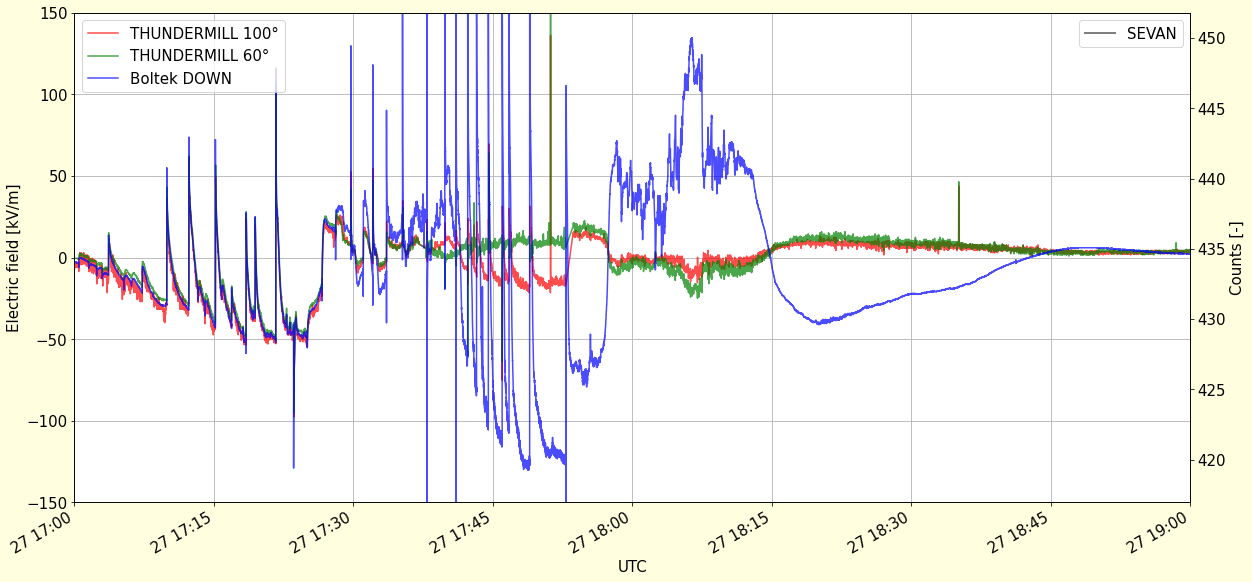

In [350]:
plt.figure(figsize=(20,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})


label = 'THUNDERMILL 100°'
color = 'red'
factor = 3.4 # kV/m . DIV 
plt.plot((dftd['field']*factor+3), label=label, color=color, alpha=0.7)

label = 'THUNDERMILL 60°'
color = 'green'
factor = 3.4 # kV/m . DIV 
plt.plot((dftd['field2']*factor+3), label=label, color=color, alpha=0.7)

label = 'Boltek DOWN'
color = 'blue'
factor = 4

(dfbd['field']*factor).plot(label=label, color=color, alpha=0.7)
plt.ylabel('Electric field [kV/m]')

plt.grid()
plt.xlabel('UTC')

#plt.plot(dfs[3], alpha=0.5, color='green', label='Boltek')
plt.ylim(-150,150)

#plt.xlim('2024-06-27 03:10','2024-6-27 06:20')
plt.xlim('2024-06-27 17:00','2024-6-27 19:00')
#plt.xlim('2024-05-11 14:30','2024-5-11 16:30')
#plt.xlim('2024-07-1 9:00','2024-7-1 10:35')
plt.legend(loc=2)

plt.twinx()

plt.plot(dfs[2], color='black', lw=2, alpha=0.5, drawstyle='steps-mid', label='SEVAN')
plt.ylabel('Counts [-]')
plt.legend(loc=1)

dfbd.to_csv('b20240627.csv')
dftd.to_csv('t20240627.csv')


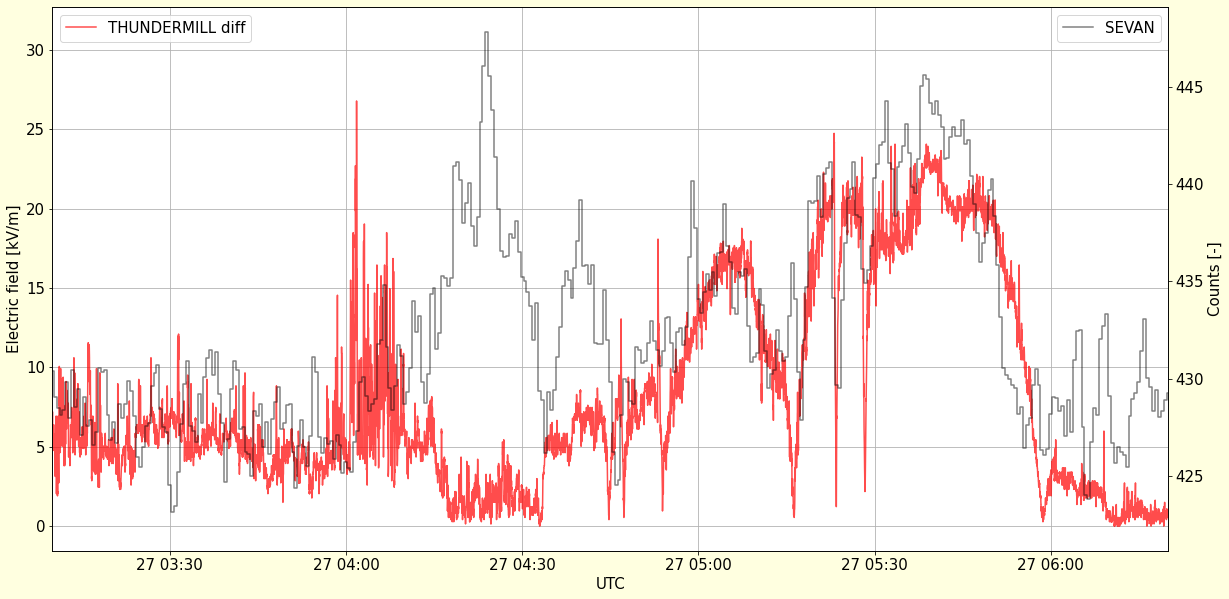

In [316]:
plt.figure(figsize=(20,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})


label = 'THUNDERMILL diff'
color = 'red'
factor = 3.4 # kV/m . DIV 
#factor = 20 # kV/m . DIV 
plt.plot(abs((dftd['field']*factor+3)-(dftd['field2']*factor+3)).rolling(5).mean(), label=label, color=color, alpha=0.7)

label = 'Boltek DOWN'
color = 'blue'
factor = 4

#(dfbd['field']*factor).plot(label=label, color=color, alpha=0.7)

plt.ylabel('Electric field [kV/m]')

plt.grid()
plt.xlabel('UTC')

#plt.plot(dfs[3], alpha=0.5, color='green', label='Boltek')
#plt.ylim(-150,150)

plt.xlim(pd.to_datetime('2024-06-27 03:10'),pd.to_datetime('2024-6-27 06:20'))
#plt.xlim('2024-06-27 04:15','2024-6-27 04:20')
plt.legend(loc=2)

plt.twinx()

plt.plot(dfs[2].rolling(3).mean(), color='black', alpha=0.5, drawstyle='steps-mid', label='SEVAN')
plt.ylabel('Counts [-]')
plt.legend(loc=1)


<Figure size 1440x720 with 0 Axes>

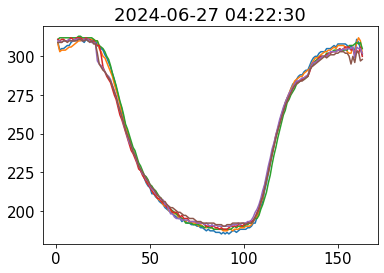

<Figure size 1440x720 with 0 Axes>

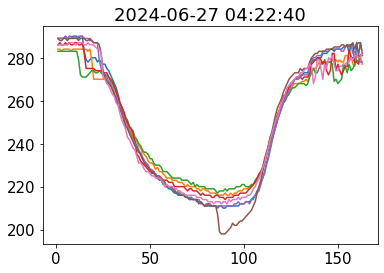

<Figure size 1440x720 with 0 Axes>

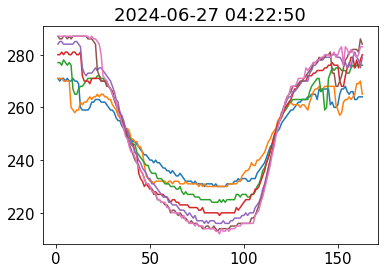

<Figure size 1440x720 with 0 Axes>

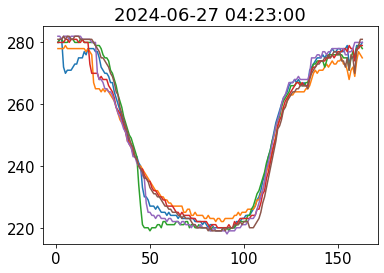

<Figure size 1440x720 with 0 Axes>

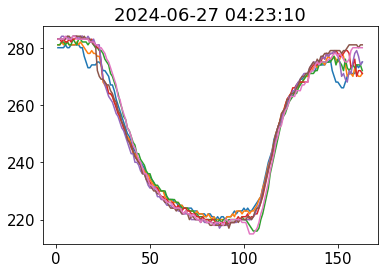

<Figure size 1440x720 with 0 Axes>

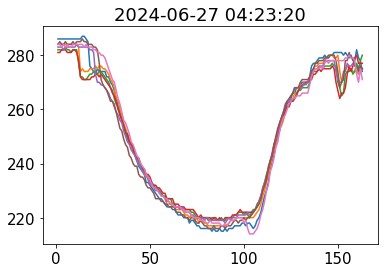

In [341]:

df = dftd
                                 
for n in range(0,60,10):
    try:
        TIME = pd.to_datetime('2024-06-27 4:15') + pd.to_timedelta(n, 'seconds')
        TIME = pd.to_datetime('2024-06-27 4:17') + pd.to_timedelta(n, 'seconds')
        TIME = pd.to_datetime('2024-06-27 4:22') + pd.to_timedelta(n, 'seconds') # prvni
        #TIME = pd.to_datetime('2024-06-27 17:59') + pd.to_timedelta(n, 'seconds') # druhy
        #TIME = pd.to_datetime('2024-05-11 15:29') + pd.to_timedelta(n, 'seconds') # druhy
        #TIME = pd.to_datetime('2024-07-1 9:43') + pd.to_timedelta(n, 'seconds') 
        TIMEEND = TIME + pd.to_timedelta(5, 's')
        plt.figure(figsize=(20,10), facecolor='lightyellow')
        matplotlib.rcParams.update({'font.size': 15})
        df.loc[TIME:TIMEEND,1:163].T.plot(legend=None)
        #plt.ylim(100,400)
        plt.title(TIME)
        plt.show()
    except:
        continue


/storage/stations/LS/vezicka/mrakomer/mrakomer.csv.2024-06-27_23
/storage/stations/LS/vezicka/mrakomer/mrakomer.csv.2024-06-27_11
/storage/stations/LS/vezicka/mrakomer/mrakomer.csv.2024-06-27_02
/storage/stations/LS/vezicka/mrakomer/mrakomer.csv.2024-06-27_08
/storage/stations/LS/vezicka/mrakomer/mrakomer.csv.2024-06-27_05
/storage/stations/LS/vezicka/mrakomer/mrakomer.csv.2024-06-27_16
/storage/stations/LS/vezicka/mrakomer/mrakomer.csv.2024-06-27_20
/storage/stations/LS/vezicka/mrakomer/mrakomer.csv.2024-06-27_12
/storage/stations/LS/vezicka/mrakomer/mrakomer.csv.2024-06-27_18
/storage/stations/LS/vezicka/mrakomer/mrakomer.csv.2024-06-27_01
/storage/stations/LS/vezicka/mrakomer/mrakomer.csv.2024-06-27_06
/storage/stations/LS/vezicka/mrakomer/mrakomer.csv.2024-06-27_15
/storage/stations/LS/vezicka/mrakomer/mrakomer.csv.2024-06-27_17
/storage/stations/LS/vezicka/mrakomer/mrakomer.csv.2024-06-27_04
/storage/stations/LS/vezicka/mrakomer/mrakomer.csv.2024-06-27_09
/storage/stations/LS/vezi

Text(0.5, 0, 'Time')

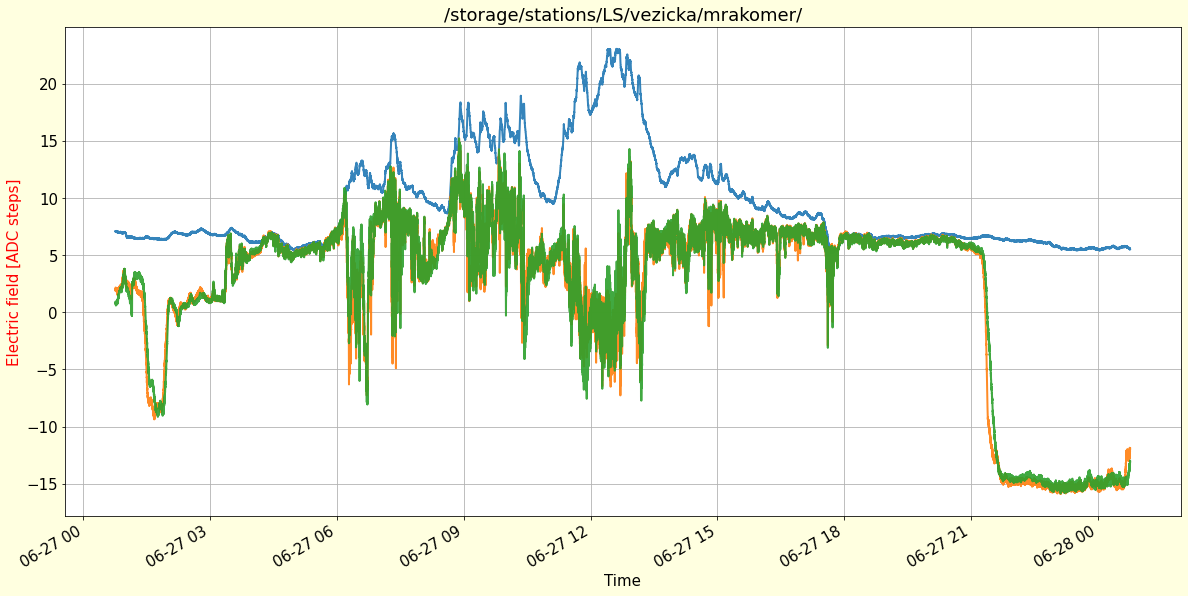

In [133]:
plt.figure(figsize=(20,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})

fto = '/storage/stations/LS/vezicka/mrakomer/'
selection = '2024-06-27_*' 

ftt = glob.iglob(fto+"mrakomer.csv."+selection) # generator, search immediate subdirectories 

label = 'MRAKOMER'
color = 'green'
factor = 0.2 # kV/m . DIV 

mrak = pd.DataFrame()

for f in ftt:
    print(f)
    l=[]
    l.extend(range(0,203))
    
    rdf = pd.read_csv(f, sep='\s+|,| ', header=None, comment='#', on_bad_lines='skip', engine='python')

    
    rdf['time'] = pd.to_datetime(rdf[0],unit='s')
    rdf.set_index('time', inplace=True, drop=False)
    
    mrak = pd.concat([mrak, rdf])

mrak.sort_index(inplace=True)
(mrak[3]/100).plot(label=label, lw=2, alpha=0.9)
(mrak[4]/100).plot(label=label, lw=2, alpha=0.9)
(mrak[5]/100).plot(label=label, lw=2, alpha=0.9)
plt.ylabel('Electric field [ADC steps]', color='red')
plt.title(fto)
plt.grid()
plt.xlabel('Time')


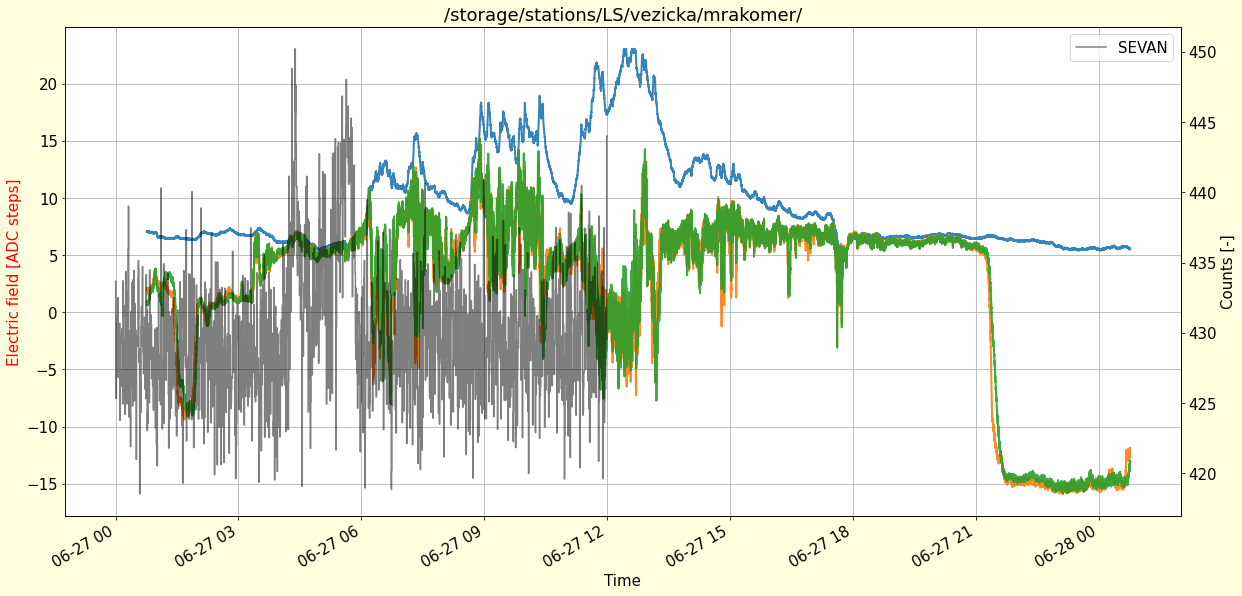

In [137]:
plt.figure(figsize=(20,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})

(mrak[3]/100).plot(label=label, lw=2, alpha=0.9)
(mrak[4]/100).plot(label=label, lw=2, alpha=0.9)
(mrak[5]/100).plot(label=label, lw=2, alpha=0.9)
plt.ylabel('Electric field [ADC steps]', color='red')
plt.title(fto)
plt.grid()
plt.xlabel('Time')

plt.twinx()

plt.plot(dfs[2], color='black', alpha=0.5, drawstyle='steps-mid', label='SEVAN')
plt.ylabel('Counts [-]')
plt.legend(loc=1)


In [136]:
mrak

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,time
time,,,,,,,,,,,,,,,,,,,,
2024-06-27 00:45:47.820000000,1.719449e+09,$M4.1,29203,711,205,91,-6,0,0,*4F,FF,FF,FF,FF,FF,FF,FF,FF,FF,2024-06-27 00:45:47.820000000
2024-06-27 00:45:49.060000000,1.719449e+09,$M4.1,29204,703,193,87,-6,0,0,*40,FF,FF,FF,FF,FF,FF,FF,FF,FF,2024-06-27 00:45:49.060000000
2024-06-27 00:45:50.280000000,1.719449e+09,$M4.1,29205,709,201,79,-6,0,0,*42,FF,FF,FF,FF,FF,FF,FF,FF,FF,2024-06-27 00:45:50.280000000
2024-06-27 00:45:51.500000000,1.719449e+09,$M4.1,29206,705,189,79,-6,0,0,*4E,FF,FF,FF,FF,FF,FF,FF,FF,FF,2024-06-27 00:45:51.500000000
2024-06-27 00:45:52.710000128,1.719449e+09,$M4.1,29207,705,197,79,-6,0,0,*40,FF,FF,FF,FF,FF,FF,FF,FF,FF,2024-06-27 00:45:52.710000128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-28 00:45:45.390000128,1.719536e+09,$M4.1,34515,551,-1189,-1311,-6,0,0,*79,FF,FF,FF,FF,FF,FF,FF,FF,FF,2024-06-28 00:45:45.390000128
2024-06-28 00:45:46.609999872,1.719536e+09,$M4.1,34516,555,-1203,-1297,-6,0,0,*70,FF,FF,FF,FF,FF,FF,FF,FF,FF,2024-06-28 00:45:46.609999872
2024-06-28 00:45:47.860000000,1.719536e+09,$M4.1,34517,555,-1197,-1315,-6,0,0,*74,FF,FF,FF,FF,FF,FF,FF,FF,FF,2024-06-28 00:45:47.860000000


Text(0.5, 1.0, '2024-07-01 09:30:00')

<Figure size 1440x720 with 0 Axes>

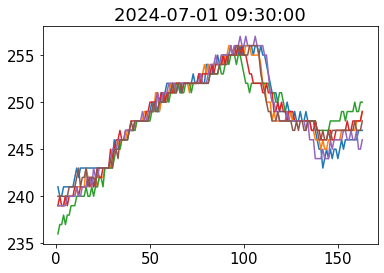

In [82]:
plt.figure(figsize=(20,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})

df = dftd

TIME = pd.to_datetime('2023-09-30 12:30:00')
TIME = pd.to_datetime('2023-09-30 15:20:00')
TIME = pd.to_datetime('2023-10-27 10:00:00')
TIME = pd.to_datetime('2024-06-16 09:10:00')
TIME = pd.to_datetime('2024-07-01 9:00')
TIMEEND = TIME + pd.to_timedelta(5, 's')
                                 
df.loc[TIME:TIMEEND,1:163].T.plot(legend=None)
#df.loc['2023-07-19 14:05:00':'2023-07-19 14:05:01',1:150].T.plot(legend=None)
#df.loc['2023-07-19 14:10:00':'2023-07-19 14:10:01',1:150].T.plot(legend=None)
#df.loc['2023-07-19 14:15:00':'2023-07-19 14:15:01',1:150].T.plot(legend=None)
#df.loc['2023-07-19 14:02:00':'2023-07-19 14:02:19',1:150].T.plot(legend=None, color='blue')
#df.loc['2023-07-19 14:02:20':'2023-07-19 14:02:29',1:150].T.plot(legend=None, color='red')
plt.title(TIME)

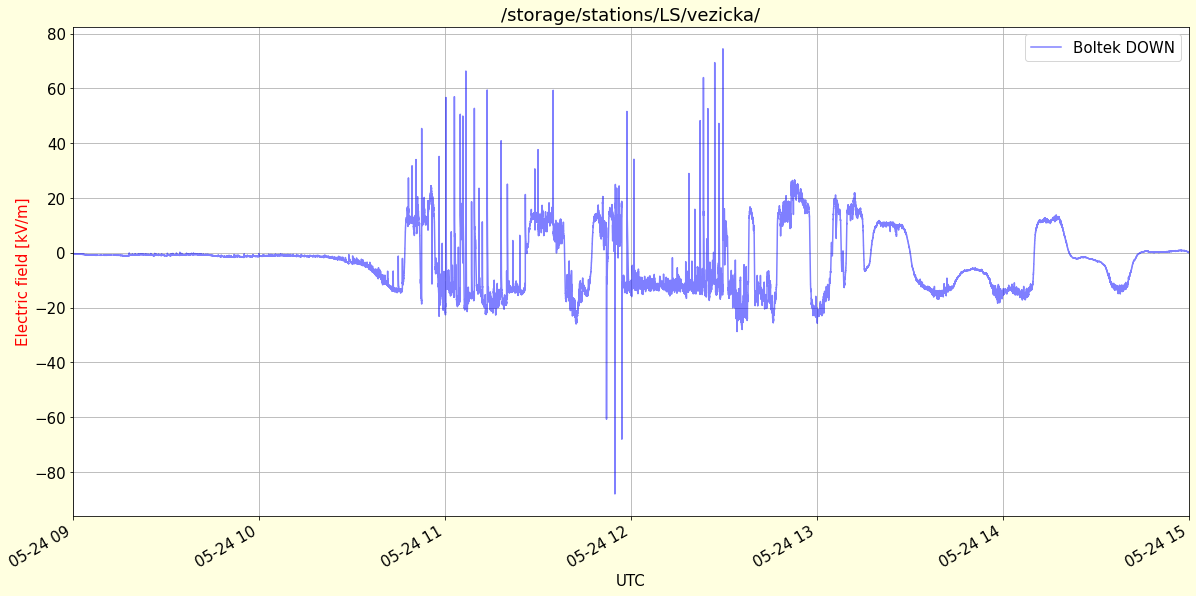

In [38]:
plt.figure(figsize=(20,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})

(dfbd['field']).plot(label=label, color=color, alpha=0.5)
#((df['field'])).plot(label=label, color=color)
#((df['field1'])).plot(label=label, color=color)
plt.ylabel('Electric field [kV/m]', color='red')
plt.title(fto)
plt.grid()
plt.xlabel('UTC')

plt.xlim('2024-05-24 09:00','2024-05-24 15:00')
#plt.ylim(-5,5)
plt.legend()


In [145]:
dftd.loc[dftd['time']>'2023-09-30 14:28:52'].loc[dftd['time']<'2023-09-30 14:28:59']

,0,1,2,3,4,5,6,7,8,9,...,192,193,194,195,196,197,198,199,field,time
time,,,,,,,,,,,,,,,,,,,,,
2023-09-30 14:28:52.369999872,1.696084e+09,254,255,255,255,256,255,255,256,256,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,2023-09-30 14:28:52.369999872
2023-09-30 14:28:53.120000000,1.696084e+09,255,255,255,256,255,256,256,256,256,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,2023-09-30 14:28:53.120000000
2023-09-30 14:28:53.869999872,1.696084e+09,511,511,511,511,511,511,511,511,511,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.9,2023-09-30 14:28:53.869999872
2023-09-30 14:28:54.620000000,1.696084e+09,330,330,330,331,331,331,331,332,332,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.8,2023-09-30 14:28:54.620000000
2023-09-30 14:28:55.380000000,1.696084e+09,291,291,292,292,292,292,292,293,293,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.4,2023-09-30 14:28:55.380000000
2023-09-30 14:28:56.130000128,1.696084e+09,272,272,273,273,273,273,274,274,274,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6,2023-09-30 14:28:56.130000128
2023-09-30 14:28:56.880000000,1.696084e+09,267,268,268,267,268,268,268,269,269,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1,2023-09-30 14:28:56.880000000
2023-09-30 14:28:57.630000128,1.696084e+09,260,260,260,260,260,260,261,261,261,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,2023-09-30 14:28:57.630000128
2023-09-30 14:28:58.380000000,1.696084e+09,261,262,261,261,262,262,262,263,263,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,2023-09-30 14:28:58.380000000
